This notebook loads the data from trajectory_analysis_script.py for whichever data set is needed. The point is to look at the density of the tracks/localizations per area of the cell.

In [2]:
from trajectory_analysis_script import *
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from scipy.stats import gaussian_kde
import os
from plotting_functions import *
from import_functions import *
from diff_mw import *
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib as mpl 
from scalebars import *
from Convert_csv_mat import *
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy import stats  
import csv  
from sklearn.cluster import OPTICS
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/foci_detection')
import simulate_foci
from sklearn.cluster import DBSCAN
from cgitb import small
import smallestenclosingcircle
import math
import guassian_fit

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_1569/3681242826.py:28: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


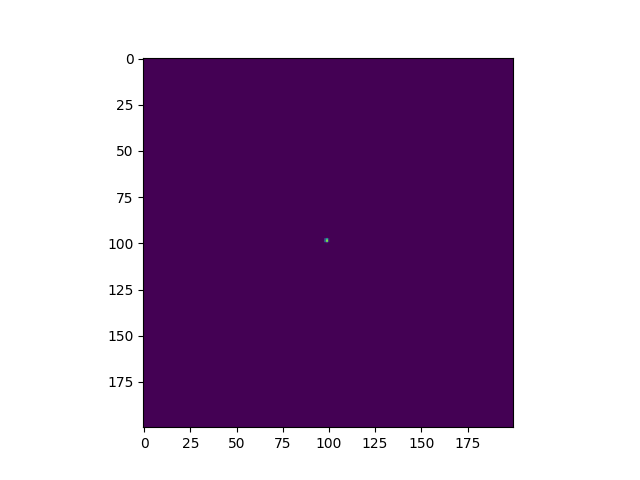

In [258]:
%matplotlib widget
sim = simulate_foci.sim_foci(max_x = 200,
                            min_x = 0,
                            radius = 2.5,
                            center = [100.,100.],
                            total_points = 1,
                            density_dif = 100000.0,
                            pdf = simulate_foci.tophat_function_2d)
sim.uniform_uniform_blob = True
sim.psf_sigma = 0.5
map,sim_xy = sim.simulate_point()
map = np.array(map)
#map += np.random.rand(*np.shape(map))*np.max(map)/100
plt.imshow(map)
plt.show()
#print(sim_xy)

1
[[98.60395207 98.52047863  1.        ]]


IndexError: index 2 is out of bounds for axis 0 with size 1

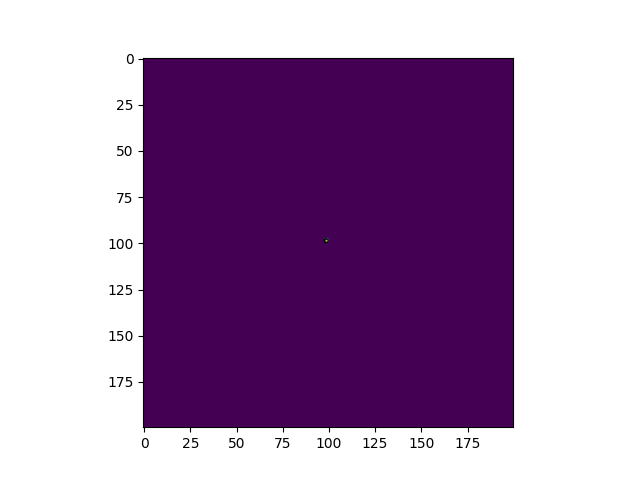

In [259]:
%matplotlib widget
b = blob_detection(path = map,\
                    median= False,\
                    threshold= 1e-2, \
                    min_sigma= 1/np.sqrt(2), \
                    max_sigma = 10/np.sqrt(2), \
                    num_sigma= 100, \
                    overlap = 0, \
                    logscale=False)
c = b.detection(type = "bp")
#print(c)
print(len(c))
print(c)
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(map)
for i in c:
    cir = plt.Circle((i[1],i[0]),i[2],fill = False)
    ax.add_artist(cir)
    cir = plt.Circle((i[1],i[0]),0.1,fill = True)
    ax.add_artist(cir)
for i in sim_xy:
    cir = plt.Circle((i[0],i[1]),0.1,fill = True,edgecolor = "orange")
    ax.add_artist(cir)
cir = plt.Circle((sim.center[0],sim.center[1]),c[2],fill = True,edgecolor = "Blue")
ax.add_artist(cir)
plt.show()


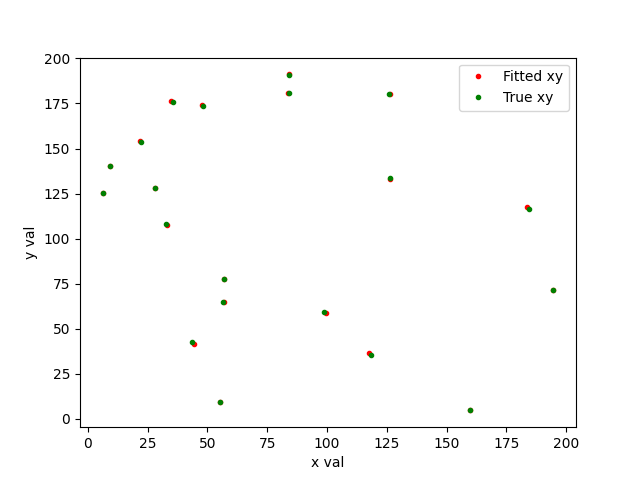

In [174]:
plt.clf()
plt.plot(c[:,0],c[:,1],'r.',label = "Fitted xy")
plt.plot(sim_xy[:,1],sim_xy[:,0],'g.',label="True xy")
plt.xlabel("x val")
plt.ylabel("y val")
plt.legend()
plt.show()

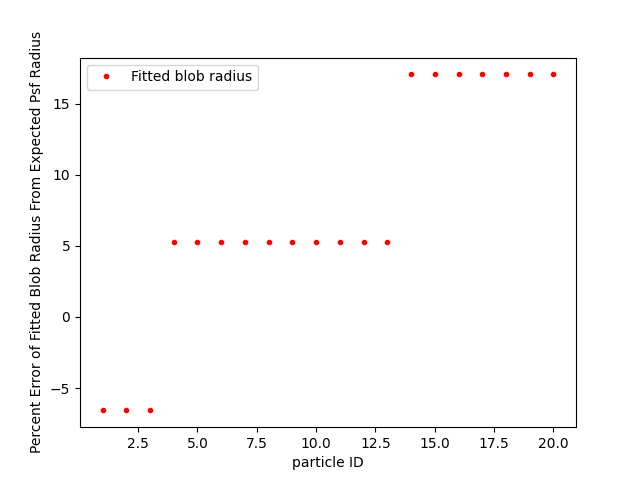

In [185]:
blob_psf = 1.*np.sqrt(2)*130
num_blobs = np.arange(1,len(c)+1,1)
plt.clf()
plt.plot(num_blobs,(c[:,2]*130 - blob_psf),'r.',label = "Fitted blob radius")
plt.xlabel("particle ID")
plt.ylabel("Percent Error of Fitted Blob Radius From Expected Psf Radius")
plt.legend()
plt.show()

In [5]:
def sim_radius_range(radius,avg = 10,psf_sigma = 1):
    mean_rads = np.zeros(len(radius))
    std_rads = np.zeros(len(radius))
    for i,j in enumerate(radius):
        avg_mean = []
        for k in range(avg):
            sim = simulate_foci.sim_foci(max_x = 200,
                                min_x = 0,
                                radius = j,
                                center = [100.,100.],
                                total_points = 200,
                                density_dif = 1000000.0,
                                pdf = simulate_foci.tophat_function_2d,
                                uniform = True)
            sim.uniform_blob = True
            sim.psf_sigma = psf_sigma
            map,sim_xy = sim.simulate_point()
            map = np.array(map)
            b = blob_detection(path = map,\
                        median= False,\
                        threshold= 1e-2, \
                        min_sigma= 1/np.sqrt(2), \
                        max_sigma = max(radius)+5/np.sqrt(2), \
                        num_sigma= 500, \
                        overlap = 0, \
                        logscale=False)
            c = b.detection(type = "bp")
            avg_mean.append(np.mean(c[:,-1]))
        print("Done {0} step".format(i))
        mean_rads[i] = np.mean(avg_mean)
        std_rads[i] = np.std(avg_mean)
    return mean_rads,std_rads
radius = np.arange(0.6,5.0,0.2)
found_radius,std_radius = sim_radius_range(radius=radius,psf_sigma = 0.77)
    

Done 0 step
Done 1 step
Done 2 step
Done 3 step
Done 4 step
Done 5 step
Done 6 step
Done 7 step
Done 8 step
Done 9 step
Done 10 step
Done 11 step
Done 12 step
Done 13 step
Done 14 step
Done 15 step
Done 16 step
Done 17 step
Done 18 step
Done 19 step
Done 20 step
Done 21 step


[ 78. 104. 130. 156. 182. 208. 234. 260. 286. 312. 338. 364. 390. 416.
 442. 468. 494. 520. 546. 572. 598. 624.] [1.278894   1.36537275 1.45833742 1.56643587 1.68102022 1.83452002
 1.95775225 2.15881536 2.323125   2.48743464 2.66255413 2.84199755
 3.04306067 3.21818015 3.35222223 3.61382047 3.8970384  3.9597355
 4.10458742 4.39645323 4.4894179  4.76831189] [0.00648591 0.00648591 0.01297181 0.01884761 0.02603355 0.03891544
 0.03873486 0.04756332 0.05621119 0.04814933 0.09881404 0.05097848
 0.08607243 0.10688089 0.12892298 0.09833989 0.12268102 0.11376559
 0.15232295 0.16278061 0.10600264 0.14600895]


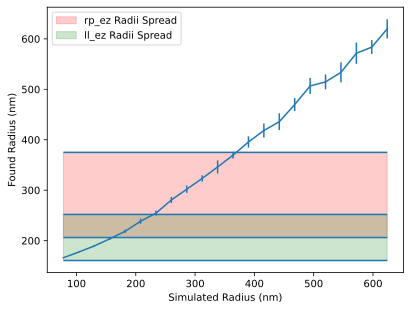

In [4]:
radius = np.arange(0.6,5.0,0.2)
min_rp_rad = 206.2 #nm
max_rp_rad = 375.0 #nm

min_ll_rad = 160.7 #nm
max_ll_rad = 252.0 #nm

min_rad = np.min(np.asarray(radius)*130)
max_rad = np.max(np.asarray(radius)*130)

plt.clf()
plt.errorbar(np.asarray(radius)*130,130*np.asarray(found_radius),yerr=130*np.asarray(std_radius))
#plt.plot(np.linspace(0,10,100),np.linspace(0,10,100),'r-')
print(radius*130,found_radius,std_radius)
# plt.ylim((0,4)) 
# plt.xlim((0,4))
plt.ylabel("Found Radius (nm)")
plt.xlabel("Simulated Radius (nm)")
plt.hlines([min_rp_rad,max_rp_rad],min_rad,max_rad)
plt.fill_between([min_rad,max_rad],[min_rp_rad,min_rp_rad],[max_rp_rad,max_rp_rad],color = 'red', alpha=0.2,label = "rp_ez Radii Spread")
plt.hlines([min_ll_rad,max_ll_rad],min_rad,max_rad)
plt.fill_between([min_rad,max_rad],[min_ll_rad,min_ll_rad],[max_ll_rad,max_ll_rad],color = 'green', alpha=0.2,label = "ll_ez Radii Spread")
plt.legend()
plt.show()


In [228]:
plt.clf()
plt.errorbar(np.asarray(radius)*130,100*np.abs(np.asarray(found_radius)-np.asarray(radius))/np.asarray(radius),yerr=100*np.asarray(std_radius)/np.asarray(radius))
#plt.plot(np.linspace(0,10,100),np.linspace(0,10,100),'r-')
print(radius/np.sqrt(2),found_radius,std_radius)
# plt.ylim((0,4))
# plt.xlim((0,4))
plt.ylabel("Percent Error")
plt.xlabel("Simulated Radius (nm)")
plt.show()



ValueError: operands could not be broadcast together with shapes (22,) (35,) 

[0.42426407 0.56568542 0.70710678 0.84852814 0.98994949 1.13137085
 1.27279221 1.41421356 1.55563492 1.69705627 1.83847763 1.97989899
 2.12132034 2.2627417  2.40416306 2.54558441 2.68700577 2.82842712
 2.96984848 3.11126984 3.25269119 3.39411255] [1.47563317 1.52319649 1.59021753 1.68318219 1.79776655 1.90802696
 2.04423101 2.21286459 2.35771651 2.54364584 2.71876532 2.87658906
 3.08630004 3.27439134 3.52734171 3.64625    3.86677084 4.00081291
 4.19539012 4.3640237  4.57157272 4.75534008] [0.         0.00864788 0.00990739 0.01059144 0.01795866 0.02161969
 0.02567196 0.04682048 0.06022549 0.05224634 0.06134051 0.09111103
 0.10059547 0.10493904 0.14026164 0.07746972 0.10195695 0.16402492
 0.08473153 0.13334284 0.15554161 0.24764691]


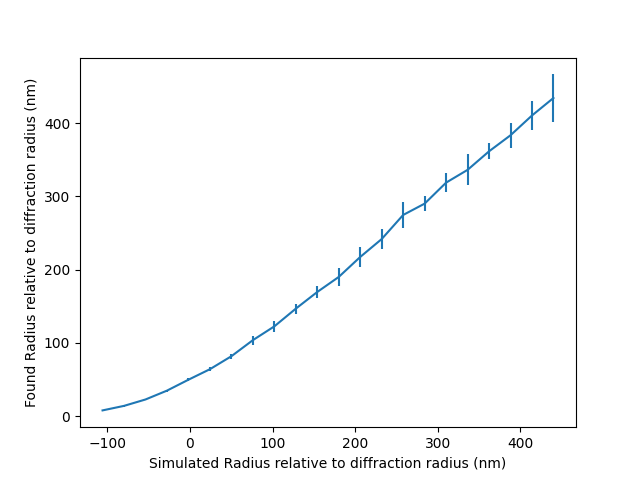

In [214]:
plt.clf()
plt.errorbar((np.asarray(radius)-np.sqrt(2))*130,(np.asarray(found_radius)-np.sqrt(2))*130,yerr=130*(np.asarray(std_radius)))
#plt.plot(np.linspace(0,10,100),np.linspace(0,10,100),'r-')
print(radius/np.sqrt(2),found_radius,std_radius)
# plt.ylim((0,4))
# plt.xlim((0,4))
plt.ylabel("Found Radius relative to diffraction radius (nm)")
plt.xlabel("Simulated Radius relative to diffraction radius (nm)")
plt.show()

[0.42426407 0.56568542 0.70710678 0.84852814 0.98994949 1.13137085
 1.27279221 1.41421356 1.55563492 1.69705627 1.83847763 1.97989899
 2.12132034 2.2627417  2.40416306 2.54558441 2.68700577 2.82842712
 2.96984848 3.11126984 3.25269119 3.39411255] [1.47563317 1.52319649 1.59021753 1.68318219 1.79776655 1.90802696
 2.04423101 2.21286459 2.35771651 2.54364584 2.71876532 2.87658906
 3.08630004 3.27439134 3.52734171 3.64625    3.86677084 4.00081291
 4.19539012 4.3640237  4.57157272 4.75534008] [0.         0.00864788 0.00990739 0.01059144 0.01795866 0.02161969
 0.02567196 0.04682048 0.06022549 0.05224634 0.06134051 0.09111103
 0.10059547 0.10493904 0.14026164 0.07746972 0.10195695 0.16402492
 0.08473153 0.13334284 0.15554161 0.24764691]


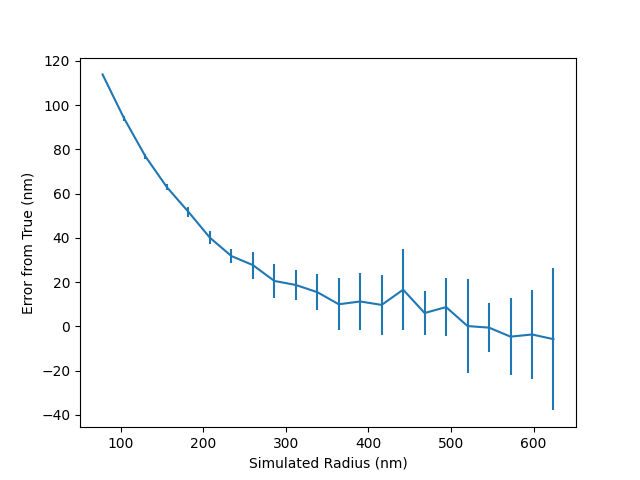

In [211]:
plt.clf()
plt.errorbar((np.asarray(radius))*130,(np.asarray(found_radius)-np.asarray(radius))*130,yerr=130*(np.asarray(std_radius)))
#plt.plot(np.linspace(0,10,100),np.linspace(0,10,100),'r-')
print(radius/np.sqrt(2),found_radius,std_radius)
# plt.ylim((0,4))
# plt.xlim((0,4))
plt.ylabel("Error from True (nm)")
plt.xlabel("Simulated Radius (nm)")
plt.show()

In [3]:
os.chdir("..")


[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 8.4970e-08
    reduced chi-square = 9.0394e-10
    Akaike info crit   = -2076.61356
    Bayesian info crit = -2060.98254
[[Variables]]
    height:      2.6291e-04 +/- 2.3900e-05 (9.09%) (init = 0.0002236457)
    centroid_x:  114.170528 +/- 0.10005367 (0.09%) (init = 114)
    centroid_y:  125.875802 +/- 0.08347276 (0.07%) (init = 126)
    sigma_x:     1.09314173 +/- 0.10401342 (9.52%) (init = 1.123719)
    sigma_y:     0.90888979 +/- 0.08476674 (9.33%) (init = 1.123719)
    background: -1.1208e-05 +/- 3.4665e-06 (30.93%) (init = -5.010093e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.482
    C(height, sigma_y)     = -0.470
    C(sigma_x, background) = -0.276
    C(sigma_y, background) = -0.273
None


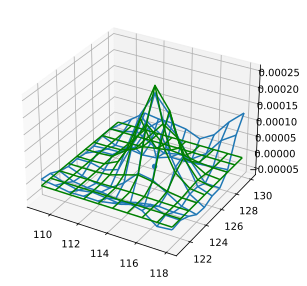

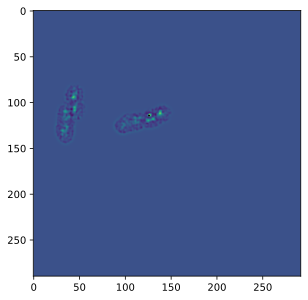

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 2.5599e-08
    reduced chi-square = 2.7234e-10
    Akaike info crit   = -2196.58633
    Bayesian info crit = -2180.95531
[[Variables]]
    height:      1.3130e-04 +/- 6.6234e-06 (5.04%) (init = 0.0001003262)
    centroid_x:  109.887499 +/- 0.10328417 (0.09%) (init = 109)
    centroid_y:  44.2952146 +/- 0.12217601 (0.28%) (init = 45)
    sigma_x:     2.57283478 +/- 0.20842723 (8.10%) (init = 2.12132)
    sigma_y:     3.12132034 +/- 0.22556314 (7.23%) (init = 2.12132)
    background: -3.2586e-05 +/- 6.5867e-06 (20.21%) (init = -4.917577e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background)    = -0.832
    C(sigma_y, background)    = -0.738
    C(height, background)     = -0.648
    C(sigma_x, sigma_y)       = 0.614
    C(height, sigma_x)        = 0.324
    C(height, sigma_y)        = 0.199
  

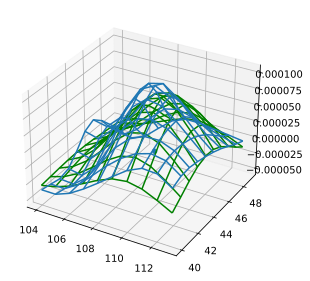

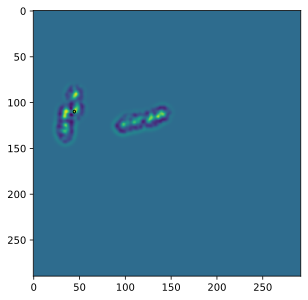

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 3.3294e-08
    reduced chi-square = 3.5420e-10
    Akaike info crit   = -2170.30456
    Bayesian info crit = -2154.67354
[[Variables]]
    height:      1.1842e-04 +/- 7.1731e-06 (6.06%) (init = 0.00010957)
    centroid_x:  112.000000 +/- 0.16701635 (0.15%) (init = 113)
    centroid_y:  141.563170 +/- 0.10421079 (0.07%) (init = 142)
    sigma_x:     2.87475405 +/- 0.25581264 (8.90%) (init = 1.874754)
    sigma_y:     1.90600912 +/- 0.17990068 (9.44%) (init = 1.874754)
    background: -1.2024e-05 +/- 5.5270e-06 (45.96%) (init = -3.335736e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background) = -0.812
    C(sigma_x, background) = -0.643
    C(sigma_x, sigma_y)    = 0.522
    C(height, background)  = -0.366
    C(height, sigma_x)     = -0.150
None


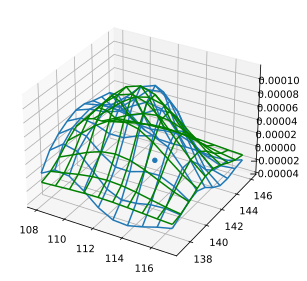

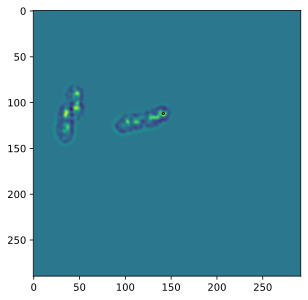

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.3287e-08
    reduced chi-square = 1.4135e-10
    Akaike info crit   = -2262.16758
    Bayesian info crit = -2246.53656
[[Variables]]
    height:      1.5599e-04 +/- 5.0182e-06 (3.22%) (init = 0.0001429457)
    centroid_x:  116.093716 +/- 0.06421781 (0.06%) (init = 116)
    centroid_y:  130.890448 +/- 0.05802790 (0.04%) (init = 131)
    sigma_x:     2.01269403 +/- 0.08484646 (4.22%) (init = 1.874754)
    sigma_y:     1.82658999 +/- 0.07816477 (4.28%) (init = 1.874754)
    background: -1.0902e-05 +/- 2.4958e-06 (22.89%) (init = -3.346146e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background) = -0.664
    C(sigma_x, background) = -0.633
    C(sigma_x, sigma_y)    = 0.420
    C(height, sigma_x)     = -0.312
    C(height, sigma_y)     = -0.290
    C(height, background)  = -0.122
None


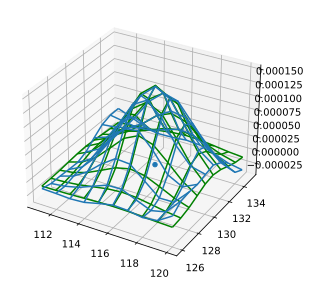

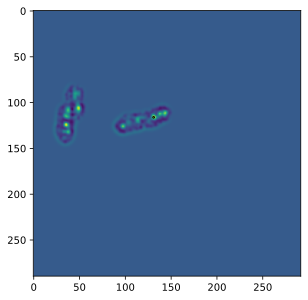

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 100
    # variables        = 6
    chi-square         = 8.5945e-09
    reduced chi-square = 9.1431e-11
    Akaike info crit   = -2305.73115
    Bayesian info crit = -2290.10013
[[Variables]]
    height:      1.5680e-04 +/- 3.8591e-06 (2.46%) (init = 0.0001255037)
    centroid_x:  126.907432 +/- 0.04199954 (0.03%) (init = 127)
    centroid_y:  36.7812750 +/- 0.06315790 (0.17%) (init = 37)
    sigma_x:     2.20791849 +/- 0.08855025 (4.01%) (init = 2.12132)
    sigma_y:     3.10346967 +/- 0.11548142 (3.72%) (init = 2.12132)
    background: -3.1516e-05 +/- 3.8379e-06 (12.18%) (init = -4.665073e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.870
    C(sigma_y, background) = -0.736
    C(sigma_x, sigma_y)    = 0.640
    C(height, background)  = -0.599
    C(height, sigma_x)     = 0.327
    C(height, sigma_y)     = 0.142
None


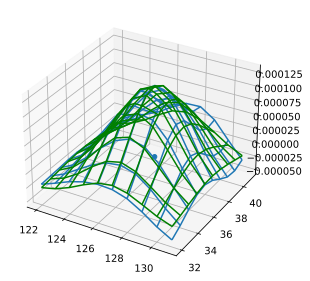

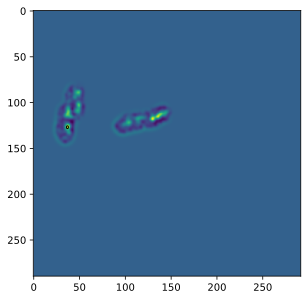

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 2.3970e-08
    reduced chi-square = 2.5500e-10
    Akaike info crit   = -2203.16498
    Bayesian info crit = -2187.53395
[[Variables]]
    height:      1.9796e-04 +/- 1.0360e-05 (5.23%) (init = 0.0001799249)
    centroid_x:  172.222880 +/- 0.06272775 (0.04%) (init = 172)
    centroid_y:  128.954316 +/- 0.06604219 (0.05%) (init = 129)
    sigma_x:     1.19854513 +/- 0.06731599 (5.62%) (init = 1.373119)
    sigma_y:     1.26187316 +/- 0.07087222 (5.62%) (init = 1.373119)
    background: -5.4297e-06 +/- 2.0256e-06 (37.31%) (init = -3.013581e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.465
    C(height, sigma_y)     = -0.465
    C(sigma_y, background) = -0.363
    C(sigma_x, background) = -0.363
    C(sigma_x, sigma_y)    = 0.132
None


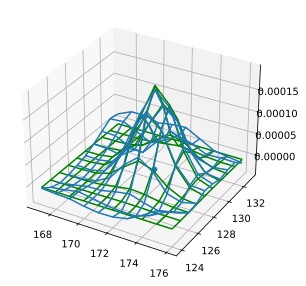

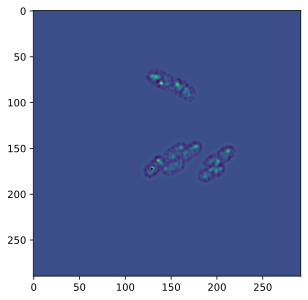

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 3.9773e-08
    reduced chi-square = 4.2312e-10
    Akaike info crit   = -2152.52358
    Bayesian info crit = -2136.89256
[[Variables]]
    height:      1.4585e-04 +/- 7.7536e-06 (5.32%) (init = 0.0001128061)
    centroid_x:  164.246626 +/- 0.16397073 (0.10%) (init = 164)
    centroid_y:  195.948546 +/- 0.08928923 (0.05%) (init = 196)
    sigma_x:     3.12132034 +/- 0.25059837 (8.03%) (init = 2.12132)
    sigma_y:     1.89564533 +/- 0.15315285 (8.08%) (init = 2.12132)
    background: -1.9437e-05 +/- 5.9518e-06 (30.62%) (init = -5.713198e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background) = -0.808
    C(sigma_x, background) = -0.593
    C(sigma_x, sigma_y)    = 0.479
    C(height, background)  = -0.393
    C(height, sigma_x)     = -0.173
    C(centroid_x, sigma_x) = 0.144
None


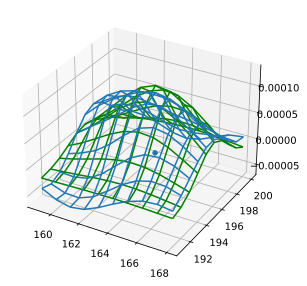

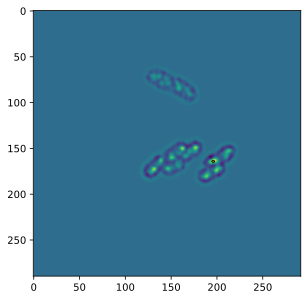

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 3.6799e-08
    reduced chi-square = 3.9148e-10
    Akaike info crit   = -2160.29518
    Bayesian info crit = -2144.66416
[[Variables]]
    height:      1.4310e-04 +/- 1.4873e-05 (10.39%) (init = 0.0001229685)
    centroid_x:  169.654308 +/- 0.10776253 (0.06%) (init = 170)
    centroid_y:  199.376726 +/- 0.11290036 (0.06%) (init = 199)
    sigma_x:     1.03832120 +/- 0.11331030 (10.91%) (init = 1.123719)
    sigma_y:     1.08766961 +/- 0.11853781 (10.90%) (init = 1.123719)
    background: -3.5746e-06 +/- 2.3383e-06 (65.42%) (init = -4.276651e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.478
    C(height, sigma_y)     = -0.477
    C(sigma_x, background) = -0.301
    C(sigma_y, background) = -0.300
None


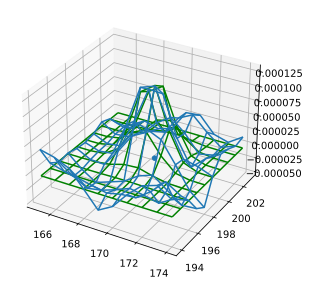

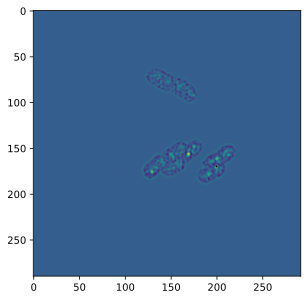

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 1.6385e-08
    reduced chi-square = 1.7431e-10
    Akaike info crit   = -2241.20458
    Bayesian info crit = -2225.57356
[[Variables]]
    height:      1.4396e-04 +/- 5.0122e-06 (3.48%) (init = 0.000114954)
    centroid_x:  176.483696 +/- 0.07955497 (0.05%) (init = 177)
    centroid_y:  191.710866 +/- 0.07130551 (0.04%) (init = 191)
    sigma_x:     2.44553247 +/- 0.11906420 (4.87%) (init = 2.12132)
    sigma_y:     2.15880045 +/- 0.11208709 (5.19%) (init = 2.12132)
    background: -2.2674e-05 +/- 3.5763e-06 (15.77%) (init = -3.448438e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background) = -0.735
    C(sigma_x, background) = -0.697
    C(sigma_x, sigma_y)    = 0.512
    C(height, background)  = -0.331
    C(height, sigma_x)     = -0.117
None


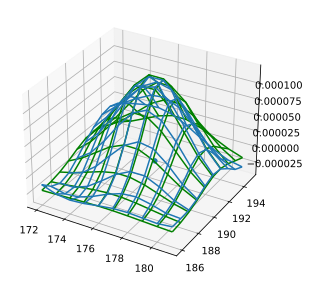

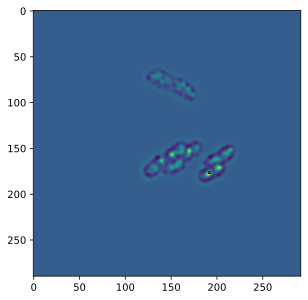

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 1.1962e-08
    reduced chi-square = 1.2725e-10
    Akaike info crit   = -2272.67387
    Bayesian info crit = -2257.04285
[[Variables]]
    height:      2.6076e-04 +/- 4.3293e-06 (1.66%) (init = 0.0002083427)
    centroid_x:  158.746145 +/- 0.04045462 (0.03%) (init = 158)
    centroid_y:  132.866234 +/- 0.03421682 (0.03%) (init = 133)
    sigma_x:     2.67882252 +/- 0.07280032 (2.72%) (init = 2.12132)
    sigma_y:     2.45329633 +/- 0.06252066 (2.55%) (init = 2.12132)
    background: -5.1043e-05 +/- 4.0627e-06 (7.96%) (init = -4.623775e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background)    = -0.808
    C(sigma_x, background)    = -0.777
    C(sigma_x, sigma_y)       = 0.627
    C(height, background)     = -0.522
    C(height, sigma_y)        = 0.165
    C(height, centroid_x)     = -0.132
 

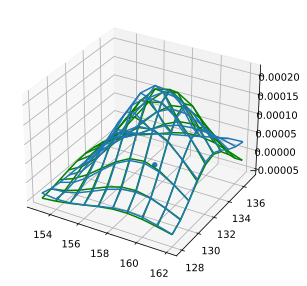

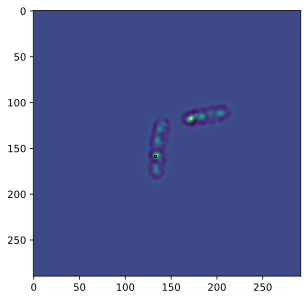

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 100
    # variables        = 6
    chi-square         = 9.8195e-09
    reduced chi-square = 1.0446e-10
    Akaike info crit   = -2292.40652
    Bayesian info crit = -2276.77550
[[Variables]]
    height:      1.8251e-04 +/- 5.5075e-06 (3.02%) (init = 0.0001369565)
    centroid_x:  201.640596 +/- 0.04355599 (0.02%) (init = 202)
    centroid_y:  136.468438 +/- 0.05269995 (0.04%) (init = 137)
    sigma_x:     2.68686655 +/- 0.12233142 (4.55%) (init = 2.12132)
    sigma_y:     3.12021259 +/- 0.13517486 (4.33%) (init = 2.12132)
    background: -4.2718e-05 +/- 6.4450e-06 (15.09%) (init = -4.126324e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.916
    C(sigma_y, background) = -0.874
    C(height, background)  = -0.834
    C(sigma_x, sigma_y)    = 0.801
    C(height, sigma_x)     = 0.650
    C(height, sigma_y)     = 0.583
None


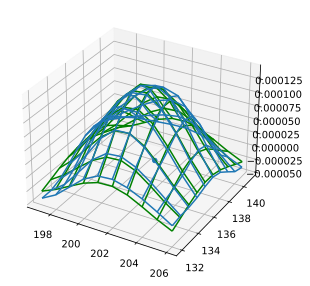

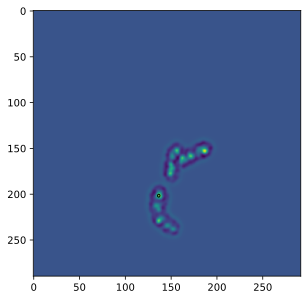

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 1.5613e-08
    reduced chi-square = 1.6609e-10
    Akaike info crit   = -2246.03568
    Bayesian info crit = -2230.40466
[[Variables]]
    height:      1.4971e-04 +/- 6.4969e-06 (4.34%) (init = 0.000108898)
    centroid_x:  199.957425 +/- 0.06740651 (0.03%) (init = 200)
    centroid_y:  137.851464 +/- 0.08221596 (0.06%) (init = 138)
    sigma_x:     2.66593331 +/- 0.17652810 (6.62%) (init = 2.12132)
    sigma_y:     3.12068780 +/- 0.19670476 (6.30%) (init = 2.12132)
    background: -3.7276e-05 +/- 7.4626e-06 (20.02%) (init = -3.836424e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.904
    C(sigma_y, background) = -0.855
    C(height, background)  = -0.805
    C(sigma_x, sigma_y)    = 0.773
    C(height, sigma_x)     = 0.599
    C(height, sigma_y)     = 0.522
None


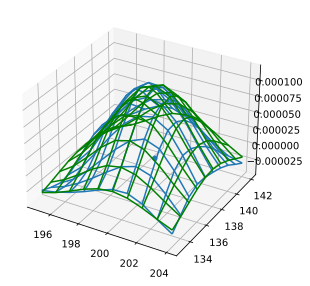

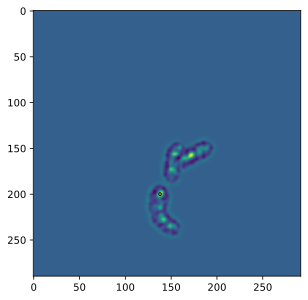

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 6.1039e-08
    reduced chi-square = 6.4935e-10
    Akaike info crit   = -2109.69307
    Bayesian info crit = -2094.06205
[[Variables]]
    height:      1.8465e-04 +/- 1.0033e-05 (5.43%) (init = 0.0001567195)
    centroid_x:  131.148499 +/- 0.10583990 (0.08%) (init = 131)
    centroid_y:  126.401226 +/- 0.11850655 (0.09%) (init = 126)
    sigma_x:     2.01740390 +/- 0.15338276 (7.60%) (init = 1.874754)
    sigma_y:     2.22397763 +/- 0.16897420 (7.60%) (init = 1.874754)
    background: -2.7657e-05 +/- 6.1262e-06 (22.15%) (init = -5.71892e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.707
    C(sigma_y, background) = -0.669
    C(sigma_x, sigma_y)    = 0.473
    C(height, sigma_y)     = -0.224
    C(height, background)  = -0.222
    C(height, sigma_x)     = -0.189
None


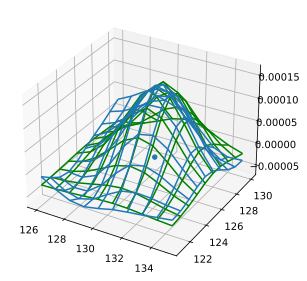

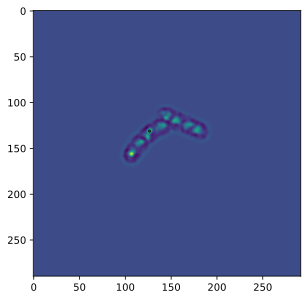

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.3953e-08
    reduced chi-square = 1.4844e-10
    Akaike info crit   = -2257.27129
    Bayesian info crit = -2241.64027
[[Variables]]
    height:      2.1386e-04 +/- 7.3849e-06 (3.45%) (init = 0.0001835942)
    centroid_x:  129.124894 +/- 0.04615079 (0.04%) (init = 129)
    centroid_y:  127.872354 +/- 0.04477177 (0.04%) (init = 128)
    sigma_x:     1.33650335 +/- 0.05029573 (3.76%) (init = 1.373119)
    sigma_y:     1.29657774 +/- 0.04883601 (3.77%) (init = 1.373119)
    background: -1.9450e-05 +/- 1.6164e-06 (8.31%) (init = -4.117933e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.458
    C(height, sigma_y)     = -0.457
    C(sigma_y, background) = -0.399
    C(sigma_x, background) = -0.397
    C(sigma_x, sigma_y)    = 0.159
None


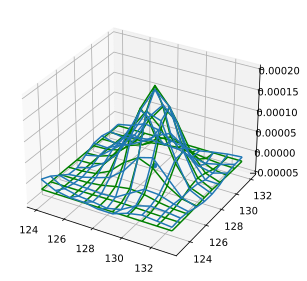

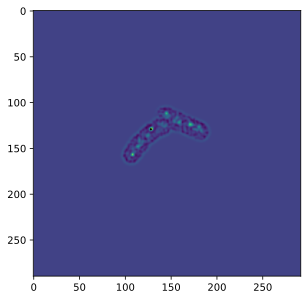

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 5.5353e-08
    reduced chi-square = 5.8886e-10
    Akaike info crit   = -2119.47084
    Bayesian info crit = -2103.83982
[[Variables]]
    height:      1.6729e-04 +/- 1.7810e-05 (10.65%) (init = 0.0001477736)
    centroid_x:  129.081548 +/- 0.11824171 (0.09%) (init = 129)
    centroid_y:  129.414954 +/- 0.11327360 (0.09%) (init = 129)
    sigma_x:     1.11098194 +/- 0.12416489 (11.18%) (init = 1.123719)
    sigma_y:     1.06470113 +/- 0.11944353 (11.22%) (init = 1.123719)
    background: -5.5973e-06 +/- 2.8944e-06 (51.71%) (init = -4.193402e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.477
    C(height, sigma_x)     = -0.475
    C(sigma_y, background) = -0.309
    C(sigma_x, background) = -0.309
None


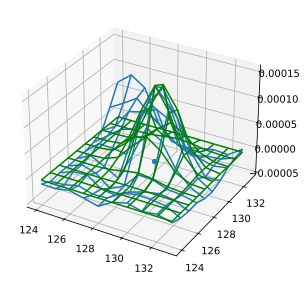

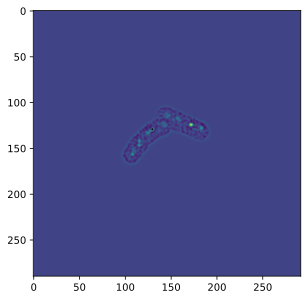

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 7.7342e-08
    reduced chi-square = 8.2278e-10
    Akaike info crit   = -2086.02047
    Bayesian info crit = -2070.38945
[[Variables]]
    height:      1.4267e-04 +/- 2.6850e-05 (18.82%) (init = 0.000123781)
    centroid_x:  134.569010 +/- 0.16826615 (0.13%) (init = 135)
    centroid_y:  130.257115 +/- 0.15274329 (0.12%) (init = 130)
    sigma_x:     0.90830950 +/- 0.17876364 (19.68%) (init = 1.123719)
    sigma_y:     0.81909819 +/- 0.15779612 (19.26%) (init = 1.123719)
    background:  2.8113e-06 +/- 3.1857e-06 (113.32%) (init = -4.057514e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.500
    C(height, sigma_y)     = -0.487
    C(sigma_x, background) = -0.238
    C(sigma_y, background) = -0.234
None


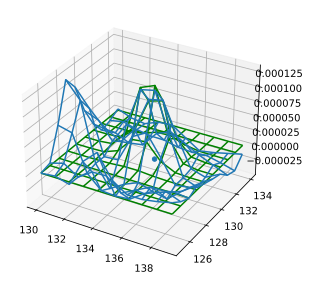

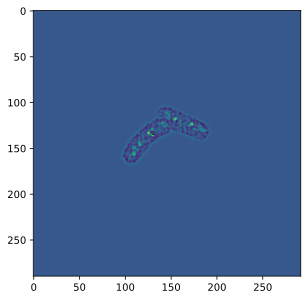

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 5.7080e-08
    reduced chi-square = 6.0724e-10
    Akaike info crit   = -2116.39789
    Bayesian info crit = -2100.76687
[[Variables]]
    height:      2.6270e-04 +/- 1.2274e-05 (4.67%) (init = 0.0002031476)
    centroid_x:  86.3571630 +/- 0.06980123 (0.08%) (init = 87)
    centroid_y:  197.473517 +/- 0.08048439 (0.04%) (init = 197)
    sigma_x:     1.49887962 +/- 0.08210550 (5.48%) (init = 1.62252)
    sigma_y:     1.72389271 +/- 0.09348477 (5.42%) (init = 1.62252)
    background: -3.2160e-05 +/- 3.8922e-06 (12.10%) (init = -8.311908e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.526
    C(sigma_y, background) = -0.490
    C(height, sigma_y)     = -0.421
    C(height, sigma_x)     = -0.405
    C(sigma_x, sigma_y)    = 0.258
None


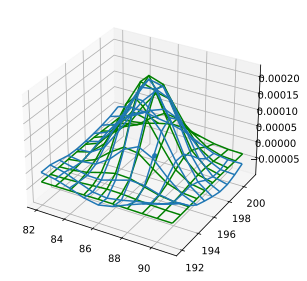

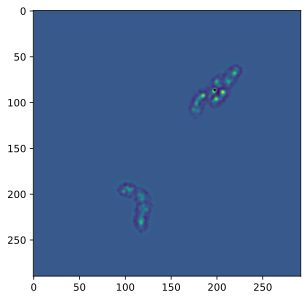

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 2.0978e-08
    reduced chi-square = 2.2317e-10
    Akaike info crit   = -2216.49460
    Bayesian info crit = -2200.86358
[[Variables]]
    height:      1.3825e-04 +/- 5.9331e-06 (4.29%) (init = 0.0001141666)
    centroid_x:  91.0770987 +/- 0.07951451 (0.09%) (init = 91)
    centroid_y:  205.594079 +/- 0.09483983 (0.05%) (init = 206)
    sigma_x:     1.91288749 +/- 0.11802482 (6.17%) (init = 2.12132)
    sigma_y:     2.26916469 +/- 0.13425048 (5.92%) (init = 2.12132)
    background: -1.6617e-05 +/- 3.6722e-06 (22.10%) (init = -3.417745e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.730
    C(sigma_y, background) = -0.675
    C(sigma_x, sigma_y)    = 0.493
    C(height, sigma_y)     = -0.223
    C(height, background)  = -0.215
    C(height, sigma_x)     = -0.177
None


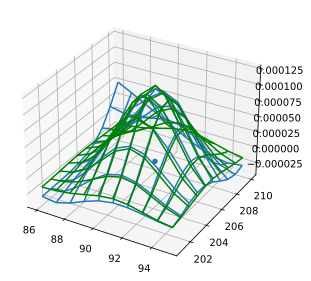

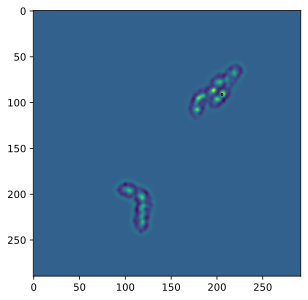

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 2.6258e-08
    reduced chi-square = 2.7934e-10
    Akaike info crit   = -2194.04560
    Bayesian info crit = -2178.41458
[[Variables]]
    height:      1.4730e-04 +/- 8.8876e-06 (6.03%) (init = 0.0001287867)
    centroid_x:  91.7586910 +/- 0.08550777 (0.09%) (init = 92)
    centroid_y:  205.247187 +/- 0.09589528 (0.05%) (init = 205)
    sigma_x:     1.41839428 +/- 0.09758196 (6.88%) (init = 1.62252)
    sigma_y:     1.58999643 +/- 0.10862997 (6.83%) (init = 1.62252)
    background: -5.7889e-06 +/- 2.4764e-06 (42.78%) (init = -3.274047e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.482
    C(sigma_y, background) = -0.465
    C(height, sigma_y)     = -0.435
    C(height, sigma_x)     = -0.429
    C(sigma_x, sigma_y)    = 0.224
None


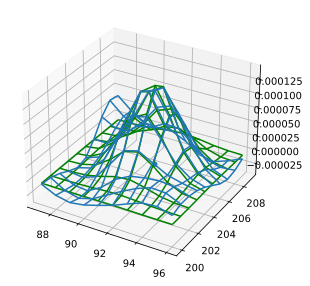

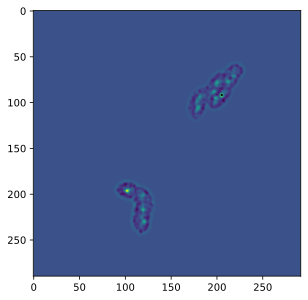

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 51
    # data points      = 100
    # variables        = 6
    chi-square         = 6.1846e-08
    reduced chi-square = 6.5794e-10
    Akaike info crit   = -2108.37810
    Bayesian info crit = -2092.74708
[[Variables]]
    height:      0.00149518 +/- 101.517796 (6789651.60%) (init = 0.000111396)
    centroid_x:  202.580333 +/- 2707.49574 (1336.50%) (init = 203)
    centroid_y:  123.421215 +/- 794.618266 (643.83%) (init = 123)
    sigma_x:     0.25083905 +/- 4227.05184 (1685164.97%) (init = 1)
    sigma_y:     0.26314973 +/- 1327.05814 (504297.74%) (init = 1)
    background:  7.2134e-06 +/- 2.6608e-06 (36.89%) (init = -5.329965e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(centroid_x, sigma_x)    = 1.000
    C(centroid_y, sigma_y)    = -1.000
    C(height, sigma_x)        = -0.965
    C(height, centroid_x)     = -0.965
    C(height, sigma_y)        = -0.278
    C(height, centroid_y)   

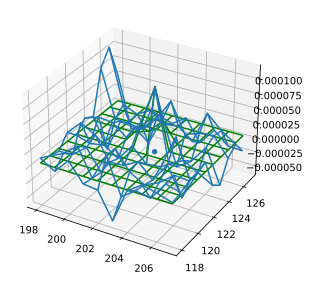

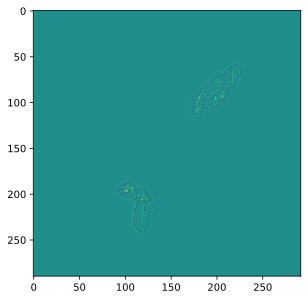

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 2.7594e-08
    reduced chi-square = 2.9355e-10
    Akaike info crit   = -2189.08515
    Bayesian info crit = -2173.45412
[[Variables]]
    height:      2.3435e-04 +/- 7.4308e-06 (3.17%) (init = 0.0001771253)
    centroid_x:  80.3817313 +/- 0.05621799 (0.07%) (init = 80)
    centroid_y:  126.420625 +/- 0.07116238 (0.06%) (init = 127)
    sigma_x:     2.52039417 +/- 0.12612911 (5.00%) (init = 2.12132)
    sigma_y:     3.12132034 +/- 0.14394350 (4.61%) (init = 2.12132)
    background: -5.4854e-05 +/- 7.9029e-06 (14.41%) (init = -5.377482e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background)    = -0.873
    C(sigma_y, background)    = -0.788
    C(height, background)     = -0.708
    C(sigma_x, sigma_y)       = 0.687
    C(height, sigma_x)        = 0.443
    C(height, sigma_y)        = 0.320
  

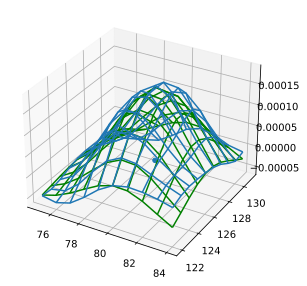

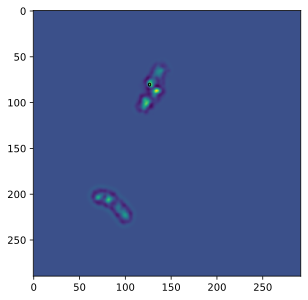

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 1.2560e-08
    reduced chi-square = 1.3362e-10
    Akaike info crit   = -2267.79125
    Bayesian info crit = -2252.16023
[[Variables]]
    height:      1.5144e-04 +/- 4.4070e-06 (2.91%) (init = 0.000115952)
    centroid_x:  80.6450305 +/- 0.05530484 (0.07%) (init = 80)
    centroid_y:  127.077062 +/- 0.07990206 (0.06%) (init = 127)
    sigma_x:     2.28149010 +/- 0.10230585 (4.48%) (init = 2.12132)
    sigma_y:     3.12132034 +/- 0.13373811 (4.28%) (init = 2.12132)
    background: -2.9555e-05 +/- 3.9290e-06 (13.29%) (init = -4.004175e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background)    = -0.814
    C(sigma_y, background)    = -0.674
    C(sigma_x, sigma_y)       = 0.549
    C(height, background)     = -0.541
    C(height, sigma_x)        = 0.195
    C(centroid_x, background) = 0.123
   

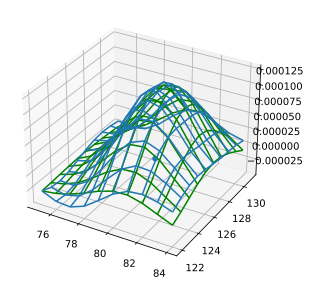

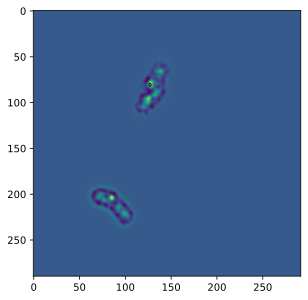

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 8.4288e-09
    reduced chi-square = 8.9668e-11
    Akaike info crit   = -2307.67832
    Bayesian info crit = -2292.04730
[[Variables]]
    height:      1.2464e-04 +/- 5.7598e-06 (4.62%) (init = 0.0001050965)
    centroid_x:  98.5201703 +/- 0.06929801 (0.07%) (init = 99)
    centroid_y:  124.584739 +/- 0.06226829 (0.05%) (init = 125)
    sigma_x:     3.12132020 +/- 0.19957582 (6.39%) (init = 2.12132)
    sigma_y:     2.87648141 +/- 0.18895187 (6.57%) (init = 2.12132)
    background: -2.1879e-05 +/- 6.8062e-06 (31.11%) (init = -3.629698e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background) = -0.922
    C(sigma_x, background) = -0.901
    C(height, background)  = -0.879
    C(sigma_x, sigma_y)    = 0.831
    C(height, sigma_y)     = 0.714
    C(height, sigma_x)     = 0.681
None


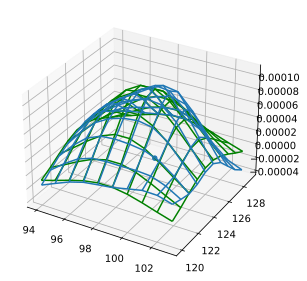

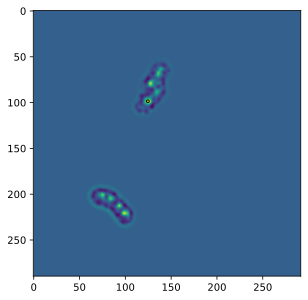

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 100
    # variables        = 6
    chi-square         = 1.3756e-08
    reduced chi-square = 1.4634e-10
    Akaike info crit   = -2258.69561
    Bayesian info crit = -2243.06459
[[Variables]]
    height:      1.3246e-04 +/- 4.6577e-06 (3.52%) (init = 0.0001187705)
    centroid_x:  80.9378874 +/- 0.06696406 (0.08%) (init = 81)
    centroid_y:  130.215156 +/- 0.08161685 (0.06%) (init = 131)
    sigma_x:     2.03897282 +/- 0.11018021 (5.40%) (init = 1.874754)
    sigma_y:     2.45013358 +/- 0.12589922 (5.14%) (init = 1.874754)
    background: -1.7774e-05 +/- 3.4958e-06 (19.67%) (init = -3.667685e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_x, background) = -0.784
    C(sigma_y, background) = -0.717
    C(sigma_x, sigma_y)    = 0.562
    C(height, background)  = -0.321
    C(height, sigma_y)     = -0.113
None


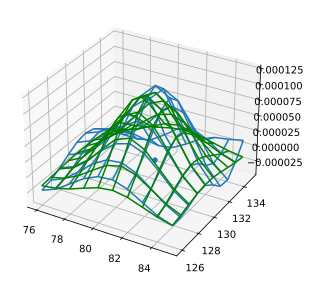

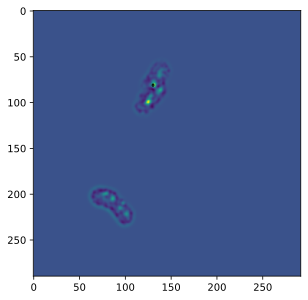

In [12]:
rp_ez= run_analysis("DATA/new_days/20190527/rpoc_ez","rpoc_ez")
rp_ez.read_parameters(minimum_percent_per_drop_in = 0.9, t_len_u = 100, t_len_l=10, minimum_tracks_per_drop = 3)
rp_ez.get_blob_parameters(threshold = 1e-4,overlap=0.5,detection_name='bp',min_sigma=1/np.sqrt(2), \
                            max_sigma=3./np.sqrt(2),num_sigma=500,median = False)

rp_ez.run_flow()

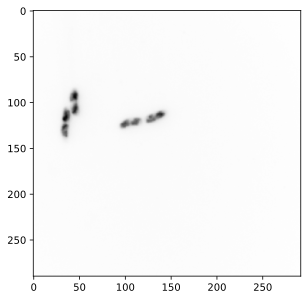

In [14]:
movie_ID = '0'
a = rp_ez.Movie[movie_ID].Movie_nucleoid
b = blob_detection(path = a,\
                    median= True,\
                    threshold= 0.05, \
                    min_sigma= 1/sqrt(2), \
                    max_sigma = 3./sqrt(2), \
                    num_sigma= 100, \
                    overlap = 0)
c = b.detection()
aa = read_file(a)
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(aa,cmap = 'Greys')
# for i in c:
#     cir = plt.Circle((i[1],i[0]),radius=i[2], fill = False)
#     ax.add_artist(cir)
plt.show()


In [ ]:
print(rp_ez.Movie[movie_ID].Movie_nucleoid)


[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 3.9100e-09
    reduced chi-square = 4.1595e-11
    Akaike info crit   = -2384.49056
    Bayesian info crit = -2368.85954
[[Variables]]
    height:      2.3053e-04 +/- 3.5649e-06 (1.55%) (init = 0.0001815949)
    centroid_x:  72.0701801 +/- 0.03467792 (0.05%) (init = 72)
    centroid_y:  132.180598 +/- 0.02039015 (0.02%) (init = 132)
    sigma_x:     3.85898446 +/- 0.08125075 (2.11%) (init = 2.873747)
    sigma_y:     2.64007025 +/- 0.05825763 (2.21%) (init = 2.873747)
    background: -4.4914e-05 +/- 4.0367e-06 (8.99%) (init = -2.896839e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_y, background)    = -0.921
    C(height, background)     = -0.859
    C(sigma_x, background)    = -0.784
    C(sigma_x, sigma_y)       = 0.722
    C(height, sigma_y)        = 0.692
    C(height, sigma_x)        = 0.492
 

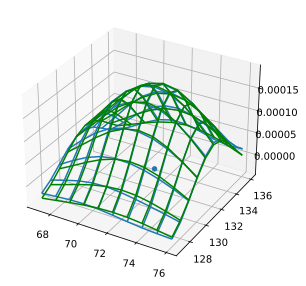

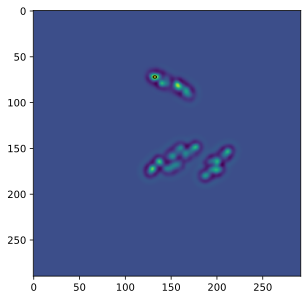

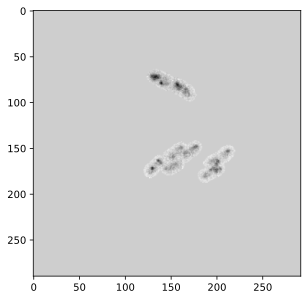

{'0,0': array([138.94454503,  78.92434992,   1.58917836]), '0,2': array([132.17617327,  71.99756631,   3.        ])}


In [22]:
from scipy.ndimage import filters
#fig,ax = run_analysis_plotting.plot_img(rp_ez,1,movie_ID,1,int("0,2"[0]))
a =rp_ez._get_movie_path('1',0)
b = blob_detection(path = a,\
                    median= True,\
                    threshold= 1e-4, \
                    min_sigma= 1, \
                    max_sigma = 3.5, \
                    num_sigma= 500, \
                    overlap = 0.8)
c = b.detection(type = 'bp')
aa = read_file(a)
fig = plt.figure()
ax = fig.add_subplot()
#ax.imshow(filters.median_filter(aa,size =1),cmap = 'Greys')
ax.imshow(aa,cmap = 'Greys')
# for i in c:
#     cir = plt.Circle((i[1],i[0]),radius=i[2], fill = False)
#     ax.add_artist(cir)
plt.show()
print(rp_ez.Movie['1'].Cells['1'].All_Drop_Collection)

In [ ]:
samples = [5,7,10,15,20,30]
axis_x = 2
axis_y = 3
x,y,fig,ax=run_analysis_plotting.draw_item(rp_ez,(axis_x,axis_y),all_tracks=False,cell_ID = '7',movie_ID='1')
x_y = np.array([[a,b] for a,b in zip(x,y)])
for i in range(axis_x):
    for j in range(axis_y):
        clustering = OPTICS(min_samples=samples[i*axis_x + j]).fit(x_y)
        a = ax[i,j].scatter(x,y,s= 1,c = clustering.labels_)
fig.colorbar(a)
fig.tight_layout()
plt.show()

In [ ]:
for i in samples:
    clustering = OPTICS(min_samples=i).fit(x_y)
    a = plt.scatter(x,y,s= 1,c = clustering.labels_)
    plt.colorbar(a)
    plt.title("min_samples = {0}".format(i))
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
sim = simulate_foci.sim_foci(max_x = 200,
                            min_x = 0,
                            radius = 50,
                            center = [100,100],
                            total_points = 500,
                            density_dif = 5.0,
                            pdf = simulate_foci.tophat_function_2d)
sim_xy = sim._makePoints()
for i in samples:
    clustering = OPTICS(min_samples=i).fit(sim_xy)
    fig = plt.figure()
    ax = fig.add_subplot()
    a = ax.scatter(sim_xy[:,0],sim_xy[:,1],s= 2,c = clustering.labels_)
    plt.colorbar(a)
    cir = plt.Circle(sim.center,radius = sim.radius,fill = False)
    ax.set_title("min_samples = {0}".format(i))
    ax.add_artist(cir)

In [ ]:
#%matplotlib qt 
#train data on the best of above: samples = 30
clustering_fit = DBSCAN(min_samples=30,eps = 1.0).fit(sim_xy)
print(rp_ez.Movie['1'].Cells['1'].Drop_Collection)
print(rp_ez.Movie['1'].Cells['4'].Drop_Collection)
x,y,fig,ax=run_analysis_plotting.draw_item(rp_ez,cell_ID = ['1'],movie_ID='1',movie_frame_index = 0,all_tracks = 1)
x_y = np.array([[a,b] for a,b in zip(x,y)])
clustering = clustering_fit.fit_predict(x_y)
a = ax.scatter(x,y,s= 1,c = clustering)
fig.colorbar(a)
fig.tight_layout()
plt.show()
print(len(x))
fig = plt.figure()
ax = fig.add_subplot()
a = ax.scatter(x,y,s= 20,c = clustering,cmap = "Greys")
fig.colorbar(a)
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()

In [ ]:
clustering_fit = DBSCAN(min_samples=30,eps = 1.0).fit(sim_xy)
x,y,fig,ax=run_analysis_plotting.draw_item(rp_ez,cell_ID = ['1'],movie_ID='1',movie_frame_index = 0,all_tracks = 1)
x_y = np.array([[a,b] for a,b in zip(x,y)])
clustering = clustering_fit.fit_predict(x_y)
a = ax.scatter(x,y,s= 1,c = clustering)
fig.colorbar(a)
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()

non_cluster = np.where((np.asarray(clustering) >= 0))[0]
# fig = plt.figure()
# ax = fig.add_subplot()
# a = read_file(rp_ez.Movie['1'].Movie_nucleoid)
# ax.imshow(a,cmap = 'Greys')
# a = ax.scatter(np.asarray(x)[non_cluster],np.asarray(y)[non_cluster],s= 20,c = clustering[non_cluster],cmap = "Greys")
# fig.colorbar(a)
# ax.set_xlim((120,190))
# ax.set_ylim((55,100))
# plt.gca().invert_yaxis()
# fig.tight_layout()
# plt.show()


fig = plt.figure()
ax = fig.add_subplot()
a = read_file(rp_ez.Movie['1'].Movie_nucleoid)
ax.imshow(a,cmap = 'Greys')
a = ax.scatter(np.asarray(x)[non_cluster],np.asarray(y)[non_cluster],s= 20,c = clustering[non_cluster],cmap = "Greys")
fig.colorbar(a)
ax.set_xlim((170,240))
ax.set_ylim((140,200))
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()


fig = plt.figure()
ax = fig.add_subplot()
a = read_file(rp_ez.Movie['1'].Movie_nucleoid)
ax.imshow(a,cmap = 'Greys')
#a = ax.scatter(np.asarray(x)[non_cluster],np.asarray(y)[non_cluster],s= 20,c = clustering[non_cluster],cmap = "Greys")
#fig.colorbar(a)
ax.set_xlim((170,240))
ax.set_ylim((140,200))
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()

In [ ]:
#only take points in cluster one at a time
unique_clusters = np.unique(clustering)[np.unique(clustering) > -1]
cluster_xy = []
for i in range(len(unique_clusters)):
    indx_i = clustering == unique_clusters[i]
    indx_i = np.array(indx_i)
    x_indx = np.array(x)[indx_i]
    y_indx = np.array(y)[indx_i]
    #make pair 
    x_y_indx = np.array([[a,b] for a,b in zip(x_indx,y_indx)])
    cluster_xy.append(x_y_indx)

cluster_circles = []
for i in cluster_xy:
    circle = smallestenclosingcircle.make_circle(i)
    cluster_circles.append(circle)

fig = plt.figure()
ax = fig.add_subplot()
a = ax.scatter(x,y,s= 20,c = clustering,cmap = "Reds")

for i in cluster_circles:
    Drawing_uncolored_circle = create_circle_obj(i,fill = False)
    ax.add_artist(Drawing_uncolored_circle)


fig.colorbar(a)
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()
print(cluster_circles)

{'0,0': array([138.94454503,  78.92434992,   1.58917836]), '0,2': array([132.17617327,  71.99756631,   3.        ])}
[138.94454503  78.92434992   1.58917836]
[132.17617327  71.99756631   3.        ]


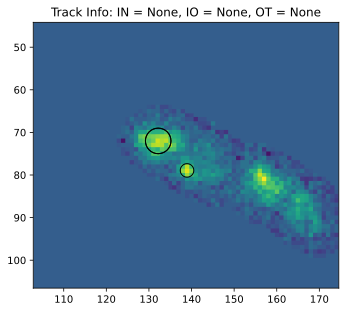

[244] [29 13]
[[149.98691627  86.54929718]
 [122.84783992  76.32821431]
 [127.42970465  64.16242147]
 [154.568781    74.38350433]]


In [23]:
from matplotlib.pyplot import plot

which_object = rp_ez
movie_ID = '1'
cell_ID = '1'
drop_ID = '0,2'
copies = 1
print(rp_ez.Movie[movie_ID].Cells[cell_ID].Drop_Collection)
drop = which_object.Movie[movie_ID].Cells[cell_ID].Drop_Collection[drop_ID]
cir = create_circle_obj(drop)
fig,ax = run_analysis_plotting.plot_img(rp_ez,copies,movie_ID,cell_ID,int(drop_ID[0]))

x_y = []

def plot_lines(dic,color,fig,a,color_first = None,color_last = None):
    len_tracks = []
    for i,j in dic.items():
        ax.plot(j.X,j.Y,color = color)
        len_tracks.append(len(j.X))
        if color_first != None:
            ax.plot(j.X[0],j.Y[0],color = color_first,markersize = 2,marker = 'o')
        if color_last != None:
            ax.plot(j.X[-1],j.Y[-1],color = color_last,markersize = 2,marker = 'o')
    return [len_tracks,fig,ax]
    
def plot_lines_bulk(movie_ID, cell_ID, drop_ID, fig, ax, plot_lines,**kwargs):
    if kwargs.get("IN",False) == True:
        len_intracks = plot_lines(rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].IN_Trajectory_Collection,
                            'red',fig,ax,color_first='black',color_last='grey')[0]
    else:
        len_intracks = None
    if kwargs.get("Io",False) == True:
        len_iotracks = plot_lines(rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].IO_Trajectory_Collection,
                            'orange',fig,ax,color_first='black',color_last='grey')[0]
    else:
        len_iotracks = None
    if kwargs.get("OT",False) == True:
        len_ottracks = plot_lines(rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].OUT_Trajectory_Collection,
                            'green',fig,ax,color_first='black',color_last='grey')[0]
    else:
        len_ottracks = None                            
    return len_intracks,len_iotracks,len_ottracks

len_intracks, len_iotracks, len_ottracks = plot_lines_bulk(movie_ID, cell_ID, drop_ID, fig, ax, plot_lines, IN = False, IO = False, OT = False)

#use bounding box of the cell to define the limits of viewing
bounding_box = which_object.Movie[movie_ID].Cells[cell_ID].bounding_box
extended_view = 20
ax.set_xlim((np.min(np.asarray(bounding_box[:,0]))-extended_view,np.max(np.asarray(bounding_box[:,0]))+extended_view))
ax.set_ylim((np.min(np.asarray(bounding_box[:,1]))-extended_view,np.max(np.asarray(bounding_box[:,1]))+extended_view))
ax.add_artist(cir)
for i,j in which_object.Movie[movie_ID].Cells[cell_ID].All_Drop_Collection.items():
    print(j)
    cir = create_circle_obj(j)
    ax.add_artist(cir)
ax.set_title("Track Info: IN = {0}, IO = {1}, OT = {2}".format(len_intracks,len_iotracks,len_ottracks))
plt.gca().invert_yaxis()
plt.show()
print(which_object.Movie[movie_ID].Cells[cell_ID].cell_area, which_object.Movie[movie_ID].Cells[cell_ID].cell_axis_lengths)
print(bounding_box)


{'0,1': array([128.95431616, 172.22287977,   1.94188377])}


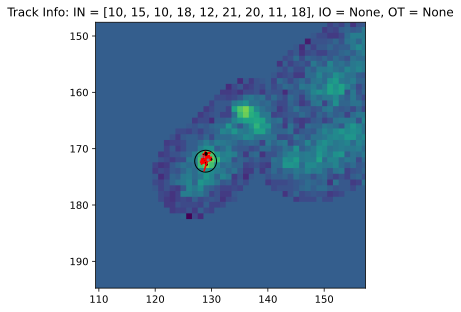

[232] [25 14]
[[147.32132083 167.90837508]
 [128.85391299 184.75933492]
 [119.41737548 174.41758652]
 [137.88478333 157.56662669]]
IN:  0.005825876547138872  Distance from out  [array([0.60632495, 0.03592056, 0.19858164, 0.25827365, 0.5136821 ,
       0.18390614, 0.44413722, 0.42908249, 0.3996049 , 0.3697753 ]), 1.0]
IN:  0.028507259912100288  Distance from out  [array([0.12306164, 0.2729884 , 0.45103522, 0.84002488, 0.23429234,
       0.89142013, 0.72337577, 0.50260251, 0.98987887, 0.35652876,
       0.43329382, 0.50873919, 0.47083051, 0.31962939, 0.90371087]), 1.0]
IN:  0.10278230248728024  Distance from out  [array([0.52123038, 0.34233335, 0.3599956 , 0.68814652, 1.71763685,
       0.8816785 , 0.75670887, 0.65768877, 0.25979276, 0.88380632]), 1.0]
IN:  0.108773821111646  Distance from out  [array([0.72453526, 0.86294577, 1.74286083, 0.94515439, 0.89294946,
       0.79248842, 0.95079803, 1.42060083, 1.65733042, 1.64029591,
       1.12264596, 0.75183818, 1.23745942, 0.98537135, 1.4144

In [24]:
from matplotlib.pyplot import plot

which_object = rp_ez
movie_ID = '1'
cell_ID = '0'
drop_ID = '0,1'
copies = 1
print(rp_ez.Movie[movie_ID].Cells[cell_ID].Drop_Collection)
drop = which_object.Movie[movie_ID].Cells[cell_ID].Drop_Collection[drop_ID]
cir = create_circle_obj(drop)
fig,ax = run_analysis_plotting.plot_img(rp_ez,copies,movie_ID,cell_ID,int(drop_ID[0]))

x_y = []

def plot_lines(dic,color,fig,a,color_first = None,color_last = None):
    len_tracks = []
    for i,j in dic.items():
        ax.plot(j.X,j.Y,color = color)
        len_tracks.append(len(j.X))
        if color_first != None:
            ax.plot(j.X[0],j.Y[0],color = color_first,markersize = 2,marker = 'o')
        if color_last != None:
            ax.plot(j.X[-1],j.Y[-1],color = color_last,markersize = 2,marker = 'o')
    return [len_tracks,fig,ax]

len_intracks, len_iotracks, len_ottracks = plot_lines_bulk(movie_ID, cell_ID, drop_ID, fig, ax, plot_lines, IN = True, IO = False, OT = False)

#use bounding box of the cell to define the limits of viewing
bounding_box = which_object.Movie[movie_ID].Cells[cell_ID].bounding_box
extended_view = 10
ax.set_xlim((np.min(np.asarray(bounding_box[:,0]))-extended_view,np.max(np.asarray(bounding_box[:,0]))+extended_view))
ax.set_ylim((np.min(np.asarray(bounding_box[:,1]))-extended_view,np.max(np.asarray(bounding_box[:,1]))+extended_view))
ax.add_artist(cir)
ax.set_title("Track Info: IN = {0}, IO = {1}, OT = {2}".format(len_intracks,len_iotracks,len_ottracks))

plt.gca().invert_yaxis()
plt.show()
print(which_object.Movie[movie_ID].Cells[cell_ID].cell_area, which_object.Movie[movie_ID].Cells[cell_ID].cell_axis_lengths)
print(bounding_box)

def get_track_Tmsd(movie_ID, cell_ID, drop_ID):
    for i,j in rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].IN_Trajectory_Collection.items():
        print("IN: ", j.MSD_total_um, " Distance from out ", j.distance_from_drop)
    for i,j in rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].IO_Trajectory_Collection.items():
        print("IO: ", j.MSD_total_um, " Distance from out ", j.distance_from_drop)
    for i,j in rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection[drop_ID].OUT_Trajectory_Collection.items():
        print("OT: ", j.MSD_total_um, " Distance from out ", j.distance_from_drop)

get_track_Tmsd(movie_ID, cell_ID, drop_ID)

[2.65130261 3.         3.         3.         3.         1.58917836
 3.         3.         3.         1.58917836 3.         1.58917836
 2.65130261 2.65130261 2.65130261 1.94188377 1.94188377 1.58917836
 3.         2.29458918 3.         1.94188377 3.         3.
 2.29458918 2.65130261 3.         2.65130261 3.         3.
 3.         3.         3.         1.94188377 1.94188377 2.29458918
 3.         3.         2.29458918 3.         2.65130261 2.65130261
 2.29458918 1.94188377 2.29458918 3.         2.65130261 2.29458918
 1.94188377 2.29458918 1.58917836 3.         2.65130261 2.29458918
 2.65130261 2.65130261 3.         2.29458918 2.65130261 3.
 1.94188377 3.         3.         3.         3.         3.
 3.         2.65130261]
130.0
206.59318637274546


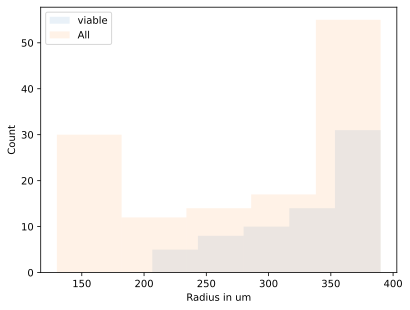

In [35]:
plt.clf()
radius = []
for i,j in rp_ez.Movie.items():
    for k,l in j.Cells.items():
        for m,n in l.Drop_Collection.items():
            radius.append(n[2])
radius = np.array(radius)
radius = radius[radius>0.]
radius_rp_ez = np.array(radius)*130
rad = []
for i,j in rp_ez.Movie.items():
    for k,l in j.Cells.items():
        for m,n in l.All_Drop_Collection.items():
            rad.append(n[2])
print(radius)
rad = np.array(rad)
rad = rad[rad>0.]
print(np.min(np.array(rad)*130))
print(np.min(radius_rp_ez))
plt.hist(radius_rp_ez,alpha = 0.1,label = "viable",bins=5)
plt.hist(np.array(rad)*130,alpha = 0.1, label = "All",bins=5)
#plt.hist(np.array(rp_ez.radius)[:,2]*0.13,alpha = 0.1, label = "All",bins=10)
plt.xlabel("Radius in um")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
%matplotlib widget
rp_ez_ba = boundary_analysis(dataset = rp_ez.Movie)
rp_ez_aa = rp_ez_ba.directional_displacement_bulk(IN = True,IO = True, OT = True)
a = rp_ez_ba.plot_directional_displacements(dir_displacements = rp_ez_aa[0],dist_center = rp_ez_aa[1],angles = rp_ez_aa[2])
def adjust_axis(a,lim = 1.5):
    a[2].set_xlim((-lim,lim))
    a[2].set_ylim((-lim,lim))
    a[2].set_aspect(1, adjustable='box')
    plt.show()
adjust_axis(a,lim = 3)

def plot_pairCorrelation(aa,**kwargs):
    x,y = rt_to_xy(np.array(aa[1]),aa[2])
    g_r, radii, interior_points = centered_pairCorrelation_2D(x = x,
                                                        y = y,
                                                        center = kwargs.get('center',[0,0]),
                                                        rMax = kwargs.get('rMax',1.1),
                                                        dr = kwargs.get('dr',0.1))
    if kwargs.get("fig", None) == None:
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.plot(radii,g_r)
    else:
        kwargs.get("ax").plot(radii,g_r)
    return [g_r, radii, interior_points,fig,ax]


In [ ]:
angles = []
centers = []
disps = []
for i,j in rp_ez.Movie.items():
    for k,l in j.Cells.items():
        sorted_tracks = rp_ez._convert_track_frame(track_set=np.array(l.raw_tracks),t_len_l = 1)
        drops = l._convert_viableDrop_list()
        for sf in range(len(sorted_tracks[0])):
            x = sorted_tracks[1][sf]
            y = sorted_tracks[2][sf]
            drop = drops[sf]
            if len(drop) > 0:
                angle,center,disp = boundary_analysis._directional_variableTracks(x,y,drop)
                angles+=angle
                centers+=center
                disps+=disp



In [ ]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(*rt_to_xy(np.array(rp_ez_aa[1]),rp_ez_aa[2]),s = 0.1)
cir = plt.Circle((0,0),1,fill = False)
ax.add_artist(cir)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()


In [ ]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(*rt_to_xy(np.array(centers),angles),s = 0.1)
cir = plt.Circle((0,0),1,fill = False)
ax.add_artist(cir)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

In [ ]:
#simulate drops of different radius 
def sim_drop(radius = 1,center = [100,100],**kwargs):
    sim = simulate_foci.sim_foci(max_x = kwargs.get("max_x",400),
                            min_x = 0,
                            radius = radius,
                            center = center,
                            total_points = kwargs.get("points",1000),
                            density_dif = kwargs.get("density",50.0),
                            pdf = simulate_foci.tophat_function_2d)
    sim_xy = sim._makePoints()
    return sim_xy
radi = np.arange(10,50,3)
centers = np.random.randint(50,150,size = (2,len(radi)))

mapped = []
for i in range(len(radi)):
    xy = sim_drop(radius=radi[i],center=centers[:,i])
    mapped.append([xy[:,0],xy[:,1],[centers[:,i][0],centers[:,i][1],radi[i]]])




angle,center,disp = boundary_analysis._directional_displacement_utility(mapped)
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(*rt_to_xy(np.array(center),angle),s = 0.1)
cir = plt.Circle((0,0),1,fill = False)
ax.add_artist(cir)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

In [ ]:
for i in range(len(mapped)):
    fig = plt.figure()
    ax = fig.add_subplot()
    a = ax.scatter(mapped[i][0],mapped[i][1],s= 2)
    cir = plt.Circle((mapped[i][2][0],mapped[i][2][1]),mapped[i][2][2],fill = False)
    ax.add_artist(cir)
    plt.show()

In [ ]:
movie_ID = '1'
cell_ID = '1'
frame = 0

seg_frame = rp_ez._get_movie_path(movie_ID=movie_ID,frame=frame)
gfp_img = rp_ez._get_nucleoid_path(movie_ID=movie_ID,cell_ID=cell_ID,full_path=False)
shape = np.shape(gfp_img)
x,y = np.meshgrid(np.arange(0,shape[0],1),np.arange(0,shape[1],1),indexing = 'ij')

print(rp_ez.Movie[movie_ID].Cells[cell_ID].bounding_box)
print(rp_ez.Movie[movie_ID].Cells[cell_ID].r_offset)
print(rp_ez.Movie[movie_ID].Cells[cell_ID].Drop_Collection)


def rescale_range(x,min_x,max_x,a,b):
    '''https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range'''
    return ((b-a)*(x - min_x)/(max_x - min_x)) + a

def _gaussian_mesh_helper(mesh_2d,initial_xy,sub_arr = [3,3]):
    ''' 
    takes a 2d_mesh (image data) and a bounding box to return a list of (x,y,z) in that bounding box
    box is implimented from the center point of the pixel.
    '''
    #make x,y,z list from mesh data
    #find dims
    sub_arr = np.array(sub_arr)
    initial_xy = np.array(initial_xy)
    minx,miny = initial_xy - sub_arr
    maxx,maxy = initial_xy + sub_arr
    minx,miny = int(minx),int(miny)
    maxx,maxy =int(maxx),int(maxy)
    centers = [rescale_range(initial_xy[0],minx,maxx,0,-2*sub_arr[1]+1),rescale_range(initial_xy[1],miny,maxy,0,-2*sub_arr[0]+1)]
    x,y = np.meshgrid(np.arange(minx,maxx,1),np.arange(miny,maxy,1))
    mesh_view = mesh_2d[minx:maxx,miny:maxy]
    
    return [x-maxx+1,y-maxy+1,mesh_view,centers]

xk,yk,zk,centers = _gaussian_mesh_helper(gfp_img,rp_ez.Movie[movie_ID].Cells[cell_ID].Drop_Collection['0,1'][:-1],sub_arr=[10,10])
x_cent = centers[0]
y_cent = centers[1]
# plt.clf()
# plt.imshow(zk)
# plt.show()
import lmfit
from lmfit import Parameters, minimize, report_fit
import tensorflow_probability as tfp
import tensorflow as tf

def sim_foci_pdf(max_x,radius,center,density_dif,points,sigma):
    min_x = 0
    max_x = max_x
    x1,y1 = tf.cast(tf.linspace(min_x,max_x,max_x),tf.float64), tf.cast(tf.linspace(min_x,max_x,max_x),tf.float64)
    a = sim_drop(radius=radius,center=center,density_dif = density_dif,max_x = max_x, points = points)
    x = a[:,0]
    y = a[:,1]
    sigma = np.array([sigma,sigma],dtype = type(a[0][0]))
    z = 0
    for i in range(len(a)):
        z += np.array(simulate_foci.get_gaussian(a[i], sigma,domain = [x1,x1]))
    return x1,y1,z

x1, y1, z = sim_foci_pdf(max_x=200,radius=2.5,center=[100,100],density_dif=100.,points=1000,sigma=1)

def gaussian2D(x, y, cen_x, cen_y, sig_x, sig_y, offset):
    return np.exp(-(((cen_x-x)/sig_x)**2 + ((cen_y-y)/sig_y)**2)/2.0) + offset

def gaus_constrained(x,y,sig_x,offset,kwargs = {}):
    return gaussian2D(x, y, cen_x = kwargs.get("cen_x",100), cen_y = kwargs.get("cen_y",100), sig_x = sig_x, sig_y = kwargs.get("sig_y",sig_x),offset = offset)


def residuals(p, x, y, z,**kwargs):
    height = p["height"].value
    #cen_x = p["centroid_x"].value
    #cen_y = p["centroid_y"].value
    sigma_x = p["sigma_x"].value
    #sigma_y = p["sigma_y"].value
    offset = p["background"].value
    return (z - height*gaus_constrained(x,y,sigma_x,offset,kwargs=kwargs))#gaussian2D(x,y, cen_x = cen_x, cen_y = cen_y, sig_x = sigma_x, sig_y = sigma_y, offset = offset))

def initalize_2dgaus(**kwargs):
    initial = Parameters()
    for i,j in kwargs.items():
        initial.add(i,value = j)
    # initial.add("height",value=.3)
    # #initial.add("centroid_x",value=100.)
    # #initial.add("centroid_y",value=100.)
    # initial.add("sigma_x",value=20.)
    # #initial.add("sigma_y",value=20.)
    # initial.add("background",value=0.015)
    return initial

initial = initalize_2dgaus(height = 0.3,sigma_x = 20.,background = 0.015)

xx,yy = np.meshgrid(x1,y1,indexing="xy")
fit = minimize(residuals, initial, args=(yy, xx, z), kws = {"cen_x":100,"cen_y":100})
print(report_fit(fit))
#z1 = fit.params["height"]*gaussian2D(xx,yy, cen_x = fit.params["centroid_x"], cen_y = fit.params["centroid_y"], sig_x = fit.params["sigma_x"], sig_y = fit.params["sigma_y"], offset = fit.params["background"])
z1 = fit.params["height"]*gaus_constrained(xx,yy,fit.params["sigma_x"],fit.params["background"])
# plt.clf() 
# #Change the Size of Graph using Figsize
# fig = plt.figure(figsize=(10,10))
 

# #Generating a 3D sine wave
# ax = plt.axes(projection='3d')

# x,y = np.meshgrid(x1,y1)
# ax.plot_wireframe(x,y,z)
# ax.plot_wireframe(x,y,z1,color = "green")
# #plt.imshow(gfp_img,cmap = "Greys")
# plt.show()
initial = initalize_2dgaus(height = 10000,sigma_x = 2.,background = 100)
fit = minimize(residuals, initial, args=(yk, xk, zk), kws = {"cen_x":x_cent,"cen_y":y_cent})
print(report_fit(fit))
z1 = fit.params["height"]*gaus_constrained(xk,yk,fit.params["sigma_x"],fit.params["background"],kwargs = {"cen_x":x_cent,"cen_y":y_cent})
plt.clf() 

#Change the Size of Graph using Figsize
fig = plt.figure(figsize=(10,10))
 

#Generating a 3D sine wave
ax = plt.axes(projection='3d')

ax.plot_wireframe(xk,yk,zk)
ax.scatter3D(x_cent,y_cent,10000)
ax.plot_wireframe(xk,yk,z1,color = "green")
#plt.imshow(gfp_img,cmap = "Greys")
plt.show()

In [ ]:
rp_ez.Movie['0'].Cells['0'].Trajectory_Collection

In [ ]:
a = rp_ez_ba.directional_displacement(rp_ez.Movie['1'].Cells['0'].Trajectory_Collection['0,1'].IN_Trajectory_Collection,rp_ez.Movie['1'].Cells['0'])
b = rp_ez_ba.plot_directional_displacements(dir_displacements = a[2],dist_center = a[1],angles = a[0])
adjust_axis(b)
print(len(a[0]))

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 38
    # data points      = 100
    # variables        = 6
    chi-square         = 4.7618e-08
    reduced chi-square = 5.0657e-10
    Akaike info crit   = -2134.52350
    Bayesian info crit = -2118.89248
[[Variables]]
    height:      2.3758e-04 +/- 5.9023e-04 (248.44%) (init = 0.0001298232)
    centroid_x:  198.437900 +/- 0.23750168 (0.12%) (init = 198)
    centroid_y:  186.780969 +/- 0.12021722 (0.06%) (init = 187)
    sigma_x:     0.43231367 +/- 0.81513399 (188.55%) (init = 1)
    sigma_y:     0.72995725 +/- 0.11659932 (15.97%) (init = 1)
    background:  1.8434e-06 +/- 2.3988e-06 (130.13%) (init = -5.946387e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)        = -0.998
    C(height, centroid_x)     = 0.982
    C(centroid_x, sigma_x)    = -0.982
    C(sigma_x, background)    = -0.214
    C(height, background)     = 0.208
    C(centroid_x, background) = 0.203
    C(

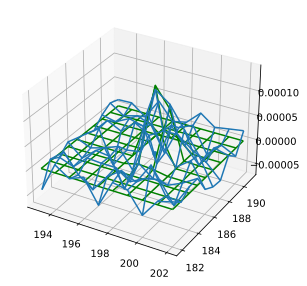

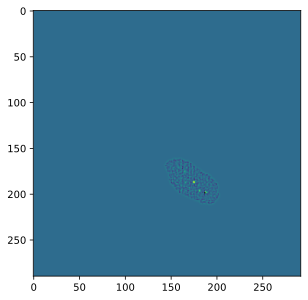

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 9.4524e-09
    reduced chi-square = 1.0056e-10
    Akaike info crit   = -2296.21684
    Bayesian info crit = -2280.58582
[[Variables]]
    height:      1.6992e-04 +/- 6.1781e-06 (3.64%) (init = 0.0001430896)
    centroid_x:  158.877852 +/- 0.04927868 (0.03%) (init = 159)
    centroid_y:  181.243345 +/- 0.04499416 (0.02%) (init = 181)
    sigma_x:     1.35535762 +/- 0.05349435 (3.95%) (init = 1.373119)
    sigma_y:     1.23751786 +/- 0.04885534 (3.95%) (init = 1.373119)
    background: -1.1407e-05 +/- 1.3149e-06 (11.53%) (init = -3.213702e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.460
    C(height, sigma_y)     = -0.459
    C(sigma_y, background) = -0.390
    C(sigma_x, background) = -0.389
    C(sigma_x, sigma_y)    = 0.152
None


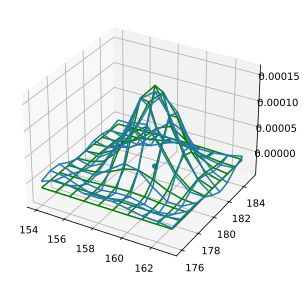

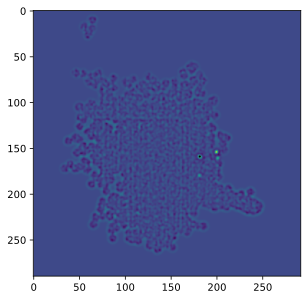

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 1.7108e-08
    reduced chi-square = 1.8200e-10
    Akaike info crit   = -2236.88986
    Bayesian info crit = -2221.25884
[[Variables]]
    height:      1.7403e-04 +/- 1.1292e-05 (6.49%) (init = 0.0001421742)
    centroid_x:  161.327029 +/- 0.05744761 (0.04%) (init = 161)
    centroid_y:  199.747336 +/- 0.06645614 (0.03%) (init = 200)
    sigma_x:     0.89274840 +/- 0.06079637 (6.81%) (init = 1.121593)
    sigma_y:     1.03024536 +/- 0.06892030 (6.69%) (init = 1.121593)
    background: -6.8626e-06 +/- 1.5400e-06 (22.44%) (init = -3.78246e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.491
    C(height, sigma_y)     = -0.481
    C(sigma_x, background) = -0.267
    C(sigma_y, background) = -0.265
None


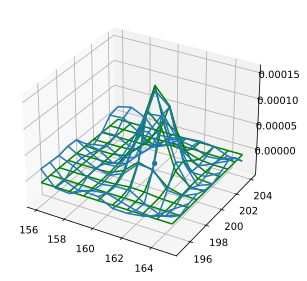

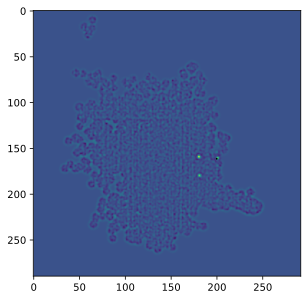

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 4.1202e-08
    reduced chi-square = 4.3832e-10
    Akaike info crit   = -2148.99455
    Bayesian info crit = -2133.36353
[[Variables]]
    height:      1.2491e-04 +/- 2.0024e-05 (16.03%) (init = 0.0001250989)
    centroid_x:  160.111487 +/- 0.14147375 (0.09%) (init = 160)
    centroid_y:  178.808181 +/- 0.17862644 (0.10%) (init = 179)
    sigma_x:     0.54549374 +/- 0.09254391 (16.97%) (init = 1)
    sigma_y:     1.05176442 +/- 0.18186116 (17.29%) (init = 1)
    background:  4.8629e-06 +/- 2.2701e-06 (46.68%) (init = -3.864357e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.513
    C(centroid_x, sigma_x) = -0.445
    C(height, sigma_x)     = -0.350
    C(height, centroid_x)  = 0.301
    C(sigma_x, background) = -0.227
    C(sigma_y, background) = -0.195
None


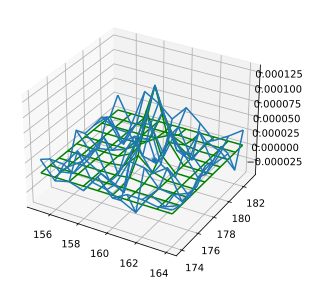

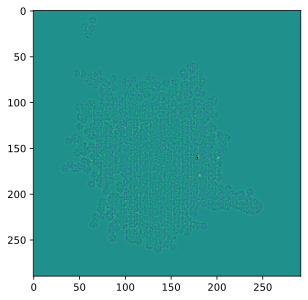

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 1.9552e-08
    reduced chi-square = 2.0800e-10
    Akaike info crit   = -2223.53578
    Bayesian info crit = -2207.90476
[[Variables]]
    height:      3.3741e-04 +/- 9.6222e-06 (2.85%) (init = 0.0002719922)
    centroid_x:  84.6874291 +/- 0.03373638 (0.04%) (init = 85)
    centroid_y:  121.304546 +/- 0.03447684 (0.03%) (init = 121)
    sigma_x:     1.18306930 +/- 0.03602295 (3.04%) (init = 1.373119)
    sigma_y:     1.20902697 +/- 0.03679188 (3.04%) (init = 1.373119)
    background: -2.3399e-05 +/- 1.8004e-06 (7.69%) (init = -5.491811e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.468
    C(height, sigma_x)     = -0.468
    C(sigma_x, background) = -0.350
    C(sigma_y, background) = -0.349
    C(sigma_x, sigma_y)    = 0.122
None


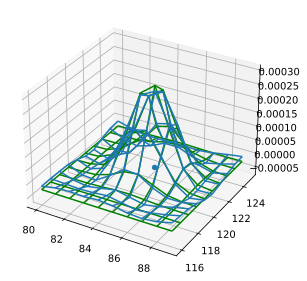

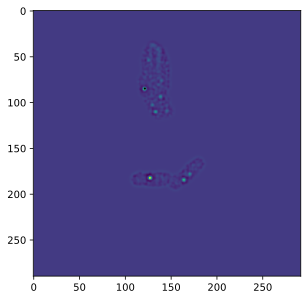

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 1.8112e-08
    reduced chi-square = 1.9268e-10
    Akaike info crit   = -2231.18716
    Bayesian info crit = -2215.55614
[[Variables]]
    height:      3.3326e-04 +/- 9.2096e-06 (2.76%) (init = 0.0002665589)
    centroid_x:  85.7106880 +/- 0.03242904 (0.04%) (init = 86)
    centroid_y:  119.577070 +/- 0.03405792 (0.03%) (init = 120)
    sigma_x:     1.17355140 +/- 0.03466688 (2.95%) (init = 1.373119)
    sigma_y:     1.23249773 +/- 0.03640590 (2.95%) (init = 1.373119)
    background: -2.2936e-05 +/- 1.7394e-06 (7.58%) (init = -5.050406e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.468
    C(height, sigma_x)     = -0.468
    C(sigma_x, background) = -0.353
    C(sigma_y, background) = -0.353
    C(sigma_x, sigma_y)    = 0.125
None


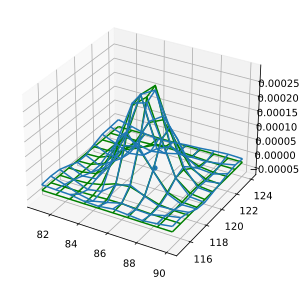

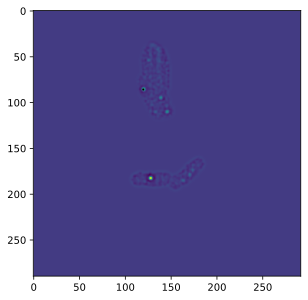

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 2.6181e-08
    reduced chi-square = 2.7852e-10
    Akaike info crit   = -2194.34080
    Bayesian info crit = -2178.70978
[[Variables]]
    height:      2.0622e-04 +/- 1.3348e-05 (6.47%) (init = 0.0001611657)
    centroid_x:  110.708891 +/- 0.06646630 (0.06%) (init = 111)
    centroid_y:  132.655632 +/- 0.06267252 (0.05%) (init = 133)
    sigma_x:     1.02968108 +/- 0.06930924 (6.73%) (init = 1.121593)
    sigma_y:     0.97164381 +/- 0.06579241 (6.77%) (init = 1.121593)
    background: -1.0424e-05 +/- 1.9299e-06 (18.52%) (init = -5.143365e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.484
    C(height, sigma_x)     = -0.480
    C(sigma_y, background) = -0.280
    C(sigma_x, background) = -0.279
None


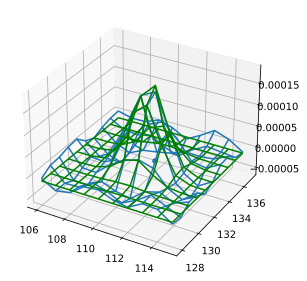

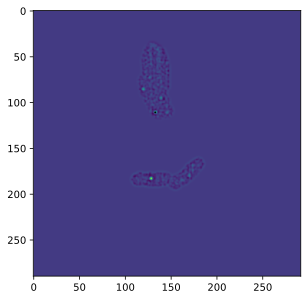

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 2.8816e-08
    reduced chi-square = 3.0655e-10
    Akaike info crit   = -2184.75116
    Bayesian info crit = -2169.12014
[[Variables]]
    height:      2.4434e-04 +/- 1.3151e-05 (5.38%) (init = 0.0002051996)
    centroid_x:  126.902188 +/- 0.05683896 (0.04%) (init = 127)
    centroid_y:  157.741207 +/- 0.05752485 (0.04%) (init = 158)
    sigma_x:     1.05486776 +/- 0.05938488 (5.63%) (init = 1.121593)
    sigma_y:     1.06793910 +/- 0.06030659 (5.65%) (init = 1.121593)
    background: -1.5789e-05 +/- 2.0674e-06 (13.09%) (init = -6.836355e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.477
    C(height, sigma_x)     = -0.476
    C(sigma_y, background) = -0.300
    C(sigma_x, background) = -0.299
None


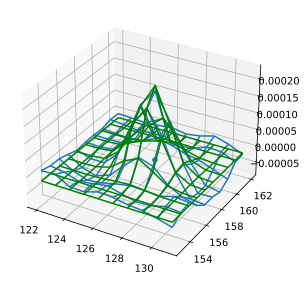

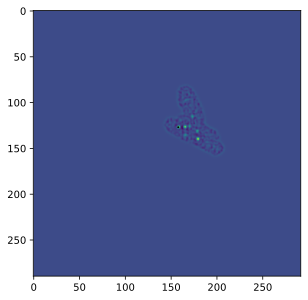

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 1.4274e-08
    reduced chi-square = 1.5185e-10
    Akaike info crit   = -2255.00143
    Bayesian info crit = -2239.37041
[[Variables]]
    height:      1.6286e-04 +/- 7.6506e-06 (4.70%) (init = 0.0001433169)
    centroid_x:  126.873958 +/- 0.05759823 (0.05%) (init = 127)
    centroid_y:  158.208353 +/- 0.06327751 (0.04%) (init = 158)
    sigma_x:     1.22614098 +/- 0.06243891 (5.09%) (init = 1.373119)
    sigma_y:     1.34702683 +/- 0.06849758 (5.09%) (init = 1.373119)
    background: -1.1461e-05 +/- 1.6062e-06 (14.01%) (init = -4.749259e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.461
    C(height, sigma_x)     = -0.460
    C(sigma_x, background) = -0.386
    C(sigma_y, background) = -0.382
    C(sigma_x, sigma_y)    = 0.148
None


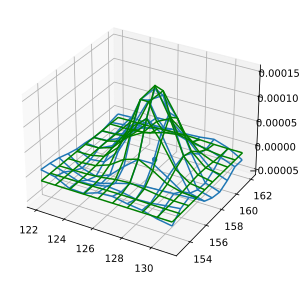

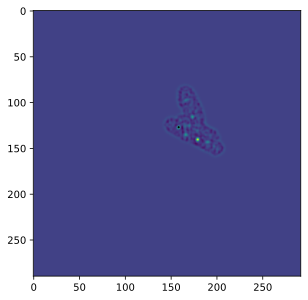

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 1.5178e-08
    reduced chi-square = 1.6147e-10
    Akaike info crit   = -2248.85701
    Bayesian info crit = -2233.22599
[[Variables]]
    height:      1.8546e-04 +/- 8.1876e-06 (4.41%) (init = 0.0001640916)
    centroid_x:  127.064856 +/- 0.05247786 (0.04%) (init = 127)
    centroid_y:  158.014163 +/- 0.05695450 (0.04%) (init = 158)
    sigma_x:     1.18855007 +/- 0.05639452 (4.74%) (init = 1.373119)
    sigma_y:     1.28996320 +/- 0.06119629 (4.74%) (init = 1.373119)
    background: -1.1213e-05 +/- 1.6186e-06 (14.43%) (init = -4.831675e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.465
    C(height, sigma_x)     = -0.464
    C(sigma_x, background) = -0.367
    C(sigma_y, background) = -0.366
    C(sigma_x, sigma_y)    = 0.134
None


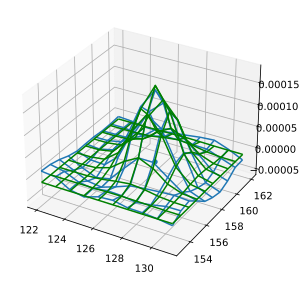

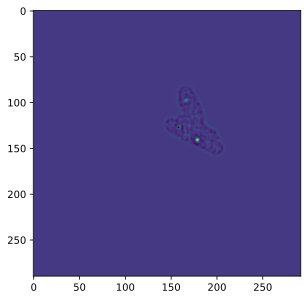

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.1679e-08
    reduced chi-square = 1.2424e-10
    Akaike info crit   = -2275.06534
    Bayesian info crit = -2259.43431
[[Variables]]
    height:      1.3794e-04 +/- 6.9252e-06 (5.02%) (init = 0.0001248577)
    centroid_x:  200.025428 +/- 0.06774000 (0.03%) (init = 200)
    centroid_y:  159.134177 +/- 0.06137134 (0.04%) (init = 159)
    sigma_x:     1.34921809 +/- 0.07335827 (5.44%) (init = 1.373119)
    sigma_y:     1.22236854 +/- 0.06650602 (5.44%) (init = 1.373119)
    background: -5.7628e-06 +/- 1.4528e-06 (25.21%) (init = -2.662307e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.461
    C(height, sigma_y)     = -0.460
    C(sigma_y, background) = -0.385
    C(sigma_x, background) = -0.384
    C(sigma_x, sigma_y)    = 0.148
None


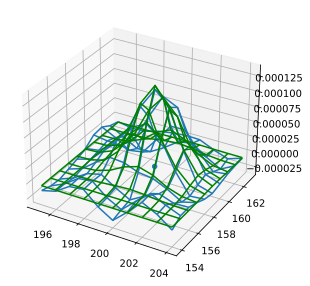

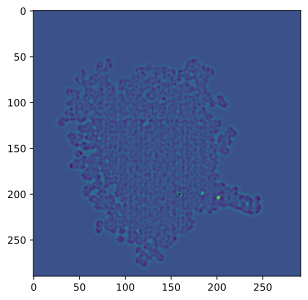

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.2646e-08
    reduced chi-square = 1.3454e-10
    Akaike info crit   = -2267.10598
    Bayesian info crit = -2251.47496
[[Variables]]
    height:      1.3588e-04 +/- 8.8399e-06 (6.51%) (init = 0.0001217088)
    centroid_x:  204.069480 +/- 0.06373855 (0.03%) (init = 204)
    centroid_y:  200.048979 +/- 0.07288258 (0.04%) (init = 200)
    sigma_x:     0.97475980 +/- 0.06582983 (6.75%) (init = 1.121593)
    sigma_y:     1.11609421 +/- 0.07612457 (6.82%) (init = 1.121593)
    background: -4.4019e-06 +/- 1.3595e-06 (30.88%) (init = -3.012265e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.478
    C(height, sigma_x)     = -0.473
    C(sigma_y, background) = -0.293
    C(sigma_x, background) = -0.291
None


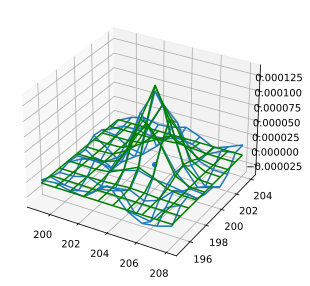

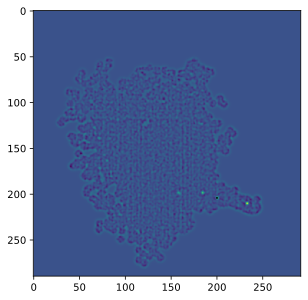

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 100
    # variables        = 6
    chi-square         = 2.1825e-08
    reduced chi-square = 2.3218e-10
    Akaike info crit   = -2212.54007
    Bayesian info crit = -2196.90904
[[Variables]]
    height:      2.0609e-04 +/- 1.2196e-05 (5.92%) (init = 0.0001786881)
    centroid_x:  209.845683 +/- 0.05720046 (0.03%) (init = 210)
    centroid_y:  232.143537 +/- 0.06092596 (0.03%) (init = 232)
    sigma_x:     0.96205524 +/- 0.05894891 (6.13%) (init = 1.121593)
    sigma_y:     1.02548442 +/- 0.06313340 (6.16%) (init = 1.121593)
    background: -9.4787e-06 +/- 1.7558e-06 (18.52%) (init = -4.684876e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.480
    C(height, sigma_x)     = -0.477
    C(sigma_y, background) = -0.275
    C(sigma_x, background) = -0.274
None


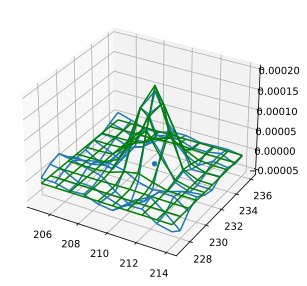

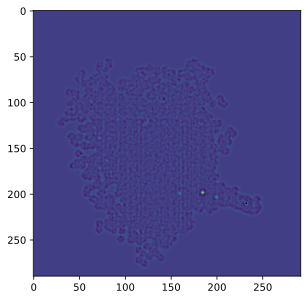

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 2.2509e-08
    reduced chi-square = 2.3946e-10
    Akaike info crit   = -2209.45274
    Bayesian info crit = -2193.82172
[[Variables]]
    height:      2.6281e-04 +/- 1.1895e-05 (4.53%) (init = 0.0002117918)
    centroid_x:  197.631971 +/- 0.04615166 (0.02%) (init = 198)
    centroid_y:  184.083870 +/- 0.04781536 (0.03%) (init = 184)
    sigma_x:     1.02054112 +/- 0.04847566 (4.75%) (init = 1.245585)
    sigma_y:     1.05649991 +/- 0.04982128 (4.72%) (init = 1.245585)
    background: -1.4198e-05 +/- 1.8124e-06 (12.77%) (init = -4.589442e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.480
    C(height, sigma_y)     = -0.477
    C(sigma_x, background) = -0.292
    C(sigma_y, background) = -0.291
None


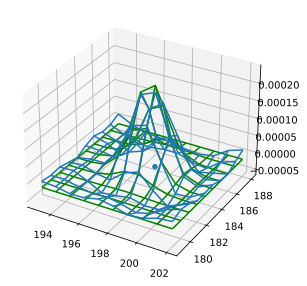

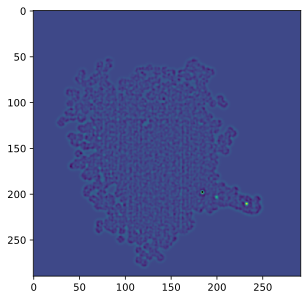

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 7
    # data points      = 100
    # variables        = 6
    chi-square         = 2.1239e-08
    reduced chi-square = 2.2594e-10
    Akaike info crit   = -2215.26188
    Bayesian info crit = -2199.63086
[[Variables]]
    height:      1.7667e-04 +/- 1.1670e-05 (6.61%) (init = 0.0001452573)
    centroid_x:  209.906411 +/- 0.06281323 (0.03%) (init = 210)
    centroid_y:  232.493674 +/- 0.07350396 (0.03%) (init = 232)
    sigma_x:     0.94475280 +/- 0.06439884 (6.82%) (init = 1.121593)
    sigma_y:     1.10815610 +/- 0.07680783 (6.93%) (init = 1.121593)
    background: -8.4316e-06 +/- 1.7490e-06 (20.74%) (init = -4.676447e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.481
    C(height, sigma_x)     = -0.471
    C(sigma_y, background) = -0.285
    C(sigma_x, background) = -0.283
None


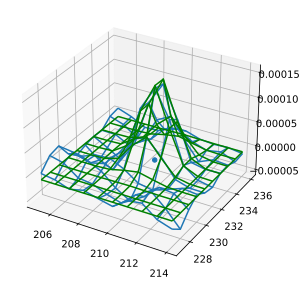

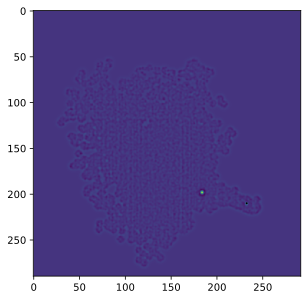

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 8.7953e-09
    reduced chi-square = 9.3567e-11
    Akaike info crit   = -2303.42146
    Bayesian info crit = -2287.79044
[[Variables]]
    height:      1.4306e-04 +/- 6.2796e-06 (4.39%) (init = 0.0001217363)
    centroid_x:  57.1458389 +/- 0.05560781 (0.10%) (init = 57)
    centroid_y:  217.765591 +/- 0.05233909 (0.02%) (init = 218)
    sigma_x:     1.26684452 +/- 0.05965150 (4.71%) (init = 1.373119)
    sigma_y:     1.19238095 +/- 0.05618092 (4.71%) (init = 1.373119)
    background: -9.8290e-06 +/- 1.2266e-06 (12.48%) (init = -2.728261e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.466
    C(height, sigma_y)     = -0.465
    C(sigma_y, background) = -0.364
    C(sigma_x, background) = -0.362
    C(sigma_x, sigma_y)    = 0.132
None


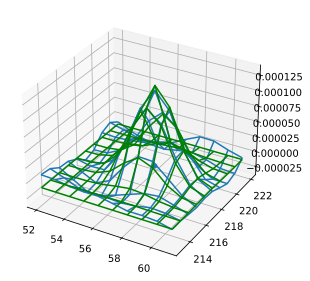

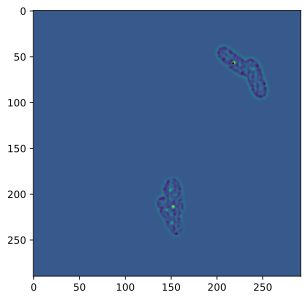

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.5536e-08
    reduced chi-square = 1.6528e-10
    Akaike info crit   = -2246.52513
    Bayesian info crit = -2230.89411
[[Variables]]
    height:      1.5606e-04 +/- 1.0287e-05 (6.59%) (init = 0.000132137)
    centroid_x:  213.872039 +/- 0.06079673 (0.03%) (init = 214)
    centroid_y:  151.942060 +/- 0.07127621 (0.05%) (init = 152)
    sigma_x:     0.91330367 +/- 0.06181754 (6.77%) (init = 1.121593)
    sigma_y:     1.07387444 +/- 0.07392816 (6.88%) (init = 1.121593)
    background: -7.2986e-06 +/- 1.4792e-06 (20.27%) (init = -3.214317e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.481
    C(height, sigma_x)     = -0.471
    C(sigma_y, background) = -0.274
    C(sigma_x, background) = -0.271
None


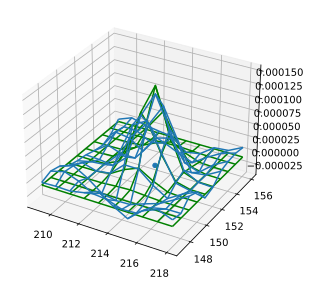

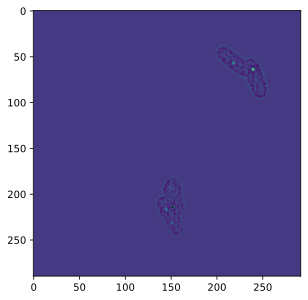

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 5
    # data points      = 100
    # variables        = 6
    chi-square         = 1.6722e-08
    reduced chi-square = 1.7790e-10
    Akaike info crit   = -2239.16840
    Bayesian info crit = -2223.53738
[[Variables]]
    height:      2.1886e-04 +/- 1.0556e-05 (4.82%) (init = 0.0001868904)
    centroid_x:  214.185291 +/- 0.04806116 (0.02%) (init = 214)
    centroid_y:  152.112919 +/- 0.04924333 (0.03%) (init = 152)
    sigma_x:     0.99346778 +/- 0.04985586 (5.02%) (init = 1.121593)
    sigma_y:     1.01780702 +/- 0.05101615 (5.01%) (init = 1.121593)
    background: -1.0294e-05 +/- 1.5435e-06 (14.99%) (init = -4.026179e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_x)     = -0.479
    C(height, sigma_y)     = -0.478
    C(sigma_x, background) = -0.279
    C(sigma_y, background) = -0.279
None


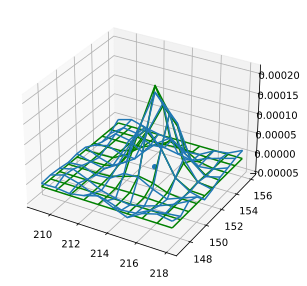

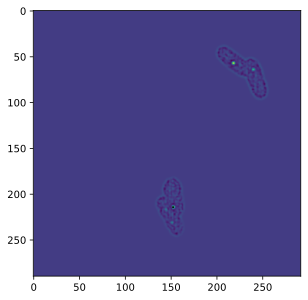

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 100
    # variables        = 6
    chi-square         = 4.2547e-08
    reduced chi-square = 4.5262e-10
    Akaike info crit   = -2145.78382
    Bayesian info crit = -2130.15280
[[Variables]]
    height:      1.2749e-04 +/- 2.0964e-05 (16.44%) (init = 0.000121417)
    centroid_x:  64.0630192 +/- 0.14021098 (0.22%) (init = 64)
    centroid_y:  238.828903 +/- 0.13361993 (0.06%) (init = 239)
    sigma_x:     0.78287645 +/- 0.12637537 (16.14%) (init = 1)
    sigma_y:     0.74003490 +/- 0.12373890 (16.72%) (init = 1)
    background:  2.2411e-06 +/- 2.2938e-06 (102.35%) (init = -4.910027e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(height, sigma_y)     = -0.463
    C(height, sigma_x)     = -0.442
    C(sigma_y, background) = -0.196
    C(sigma_x, background) = -0.192
    C(centroid_y, sigma_y) = 0.154
None


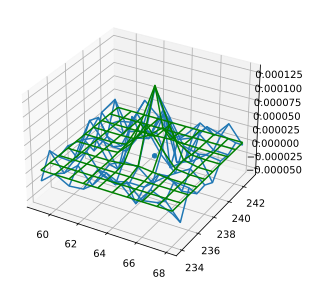

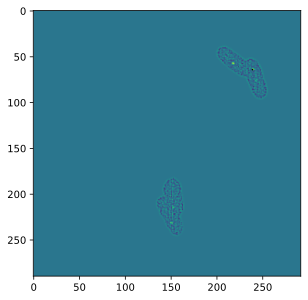

In [28]:
ll_ez= run_analysis("DATA/new_days/20190527/ll_ez","laco_laci_ez")
ll_ez.read_parameters(minimum_percent_per_drop_in = 0.5, t_len_u = 50, t_len_l=10, minimum_tracks_per_drop = 3)
ll_ez.get_blob_parameters(threshold = 1e-4,overlap=0.5,detection_name='bp',min_sigma=1./np.sqrt(2), \
                            max_sigma=3.5/np.sqrt(2),num_sigma=500,median = False)
ll_ez.run_flow()

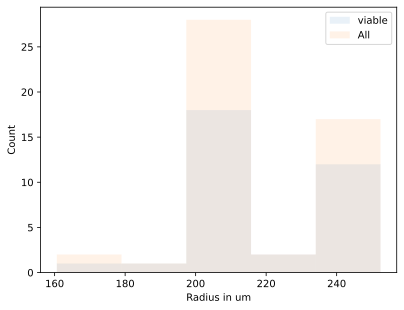

[1.58617234 1.94188377 1.58617234 1.58617234 1.58617234 1.58617234
 1.58617234 1.49098196 1.94188377 1.94188377 1.58617234 1.74148297
 1.58617234 1.23547094 1.74649299 1.23547094 1.58617234 1.94188377
 1.58617234 1.94188377 1.58617234 1.94188377 1.58617234 1.94188377
 1.58617234 1.58617234 1.58617234 1.58617234 1.58617234 1.94188377
 1.94188377 1.58617234 1.58617234 1.94188377 1.58617234 1.58617234
 1.94188377 1.94188377 1.94188377 1.58617234 1.58617234 1.94188377
 1.58617234 1.94188377 1.94188377 1.58617234 1.58617234 1.94188377
 1.58617234 1.58617234]
160.61122244488976
252.44488977955913
160.61122244488976
252.44488977955913


In [29]:
plt.clf()
radius = []
for i,j in ll_ez.Movie.items():
    for k,l in j.Cells.items():
        for m,n in l.Drop_Collection.items():
            radius.append(n[2])
radius = np.array(radius)
radius = radius[radius>1.]
rad = []
for i,j in ll_ez.Movie.items():
    for k,l in j.Cells.items():
        for m,n in l.All_Drop_Collection.items():
            rad.append(n[2])
rad = np.array(rad)
rad = rad[rad>1.]
radius_ll_ez = np.array(radius)*130
plt.hist(radius_ll_ez,alpha = 0.1,label = "viable",bins = 5)
plt.hist(np.array(rad)*130,alpha = 0.1, label = "All",bins = 5)
plt.xlabel("Radius in um")
plt.ylabel("Count")
plt.legend()
plt.show()
print(rad)
print(np.min(radius_ll_ez))
print(np.max(radius_ll_ez))
print(np.min(np.array(rad)*130))
print(np.max(np.array(rad)*130))

In [ ]:
movie_ID = '5'
a = ll_ez.Movie[movie_ID].Movie_nucleoid
b = blob_detection(path = a,\
                    median= False,\
                    threshold= 0.015, \
                    min_sigma= 1, \
                    max_sigma = 2, \
                    num_sigma= 200, \
                    overlap = 0)
c = b.detection()
aa = read_file(a)
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(aa,cmap = 'Greys')
for i in c:
    cir = plt.Circle((i[1],i[0]),radius=i[2], fill = False)
    ax.add_artist(cir)
plt.show()

In [ ]:

ll_ez_ba = boundary_analysis(dataset = ll_ez.Movie)
ll_ez_aa = ll_ez_ba.directional_displacement_bulk(IN = True,IO = True, OT = True)
b = ll_ez_ba.plot_directional_displacements(dir_displacements = ll_ez_aa[0],dist_center = ll_ez_aa[1],angles = ll_ez_aa[2])

adjust_axis(b)

# radius = []
# for i,j in ll_ez.Movie.items():
#     for k,l in j.Cells.items():
#         for m,n in l.Drop_Collection.items():
#             radius.append(n[2])
# radius_ll_ez = np.array(radius)*0.13
# plt.hist(radius_ll_ez,alpha = 0.1,label = "viable")
# plt.hist(np.array(ll_ez.radius)[:,2]*0.13,alpha = 0.1, label = "All")
# plt.xlabel("Radius in um")
# plt.ylabel("Count")
# plt.legend()
# plt.show()


# plt.hist(radius_ll_ez,alpha = 0.1,label = "ll")
# plt.hist(radius_rp_ez,alpha = 0.1,label = "rp")
# plt.legend()
# plt.show()
# plt.plot(ll_ez_aa[0],ll_ez_aa[2],'b.')
# plt.show()
print(np.sum(np.asarray(rp_ez_aa[1])>5))
a = plot_pairCorrelation(ll_ez_aa, dr = 0.05, rMax = 1.)
b = plot_pairCorrelation(rp_ez_aa, ax = a[4], dr = 0.05, rMax = 1.)
plt.show()
plt.plot(a[1],a[0],label = "ll_ez")
plt.plot(b[1],b[0],label = "rp_ez")
plt.legend()
plt.xlabel("radius")
plt.ylabel("g(r)")
plt.hlines(y = 1, xmin = 0, xmax = 1.5)


rMax = 1
dr = 0.05
edges = np.arange(0,rMax,dr)
resl,binsl = np.histogram(ll_ez_aa[1],bins = edges)
resr,binsr = np.histogram(rp_ez_aa[1],bins = edges)
num_radiusl = len(np.where(np.asarray(ll_ez_aa[1]) <= rMax)[0])
num_radiusr = len(np.where(np.asarray(rp_ez_aa[1]) <= rMax)[0])
space_density = np.zeros(len(edges)-1)
radius = np.zeros(len(edges)-1)
for i in range(len(edges)-1):
    space_density[i] = np.pi*(edges[i+1]**2 - edges[i]**2)
    radius[i] = (edges[i+1] - edges[i])/2
# plt.clf()
# plt.plot(binsl[:-1],resl)
# plt.plot(binsr[:-1],resr)
# plt.show()
# plt.plot(radius,((resl/num_radiusl)/(np.pi*rMax*rMax)) / space_density)
# plt.plot(radius,((resr/num_radiusr)/(np.pi*rMax*rMax)) / space_density)


In [ ]:
which = ll_ez
y_collection = []
x_collection = []
in_msd = []
io_msd = []
radius_col = []

#cm of track to boundary vs diff
cm_boundary = []
cm_diff = []
track_recidency_in_drop = []
cm_error = []
end_to_end = []
radius_gyration = []

IO_inside_start = []
IO_inside_start_dist = []
IO_outside_start = []
IO_outside_start_dist = []
#number of tracks that start inside and end inside
tracks_in_in = 0
len_ii = []
tracks_out_out = 0
len_oo = []
tracks_in_out = 0
len_io = []
tracks_out_in = 0
len_oi = []
directional_displacement = []
dist_center = []
long_axis_angle = []

#take notice of tracks which have displacements away from the condensate (in/out only) of >0.2 um
track_xy = []
track_drop = []
track_movie = []
track_cell = []
track_cell_e1_e2 = []
displacement_aligned_long = []
track_drop_loc = []
track_id = []
angles = []
for k,v in which.Movie.items():
   for o,oo in which.Movie[k].Cells.items():
      for kk,vv in which.Movie[k].Cells[o].Trajectory_Collection.items():
          
          for kkk,vvv in which.Movie[k].Cells[o].Trajectory_Collection[kk].IN_Trajectory_Collection.items():
              track = which.Movie[k].Cells[o].Trajectory_Collection[kk].IN_Trajectory_Collection[kkk]
              x_val = track.X
              y_val = track.Y
              drop_data = which.Movie[k].Cells[o].Drop_Collection[track.Drop_Identifier]

              diff_dist_temp = con_pix_si(dif_dis(x_val,y_val),which = 'um')
              drop_center_dist = (dist(x_val,y_val,drop_data[0],drop_data[1]))-drop_data[2]
              angles += list(angle_dist(x_val,y_val,drop_data[0],drop_data[1]))

              #direction of the trajectory
              #r2 -r1 > 0 moving out, r2 - r1 < 0 moving in
              directional = con_pix_si(np.diff(dist(x_val,y_val,drop_data[0],drop_data[1])),which = 'um')
              directional_displacement+=list(directional)
              dist_center+=list(drop_center_dist)[:-1]

              radius_col.append(drop_data[2])
              y_collection+=list(diff_dist_temp)
              x_collection+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))

              in_msd.append(track.MSD_total_um)

              #center of mass of track relative to boundary vs. diffusion of track
              cm = cm_normal(x_val,y_val)
              cm_dist_boundary = dist(cm[0],cm[1],drop_data[0],drop_data[1]) - drop_data[2]
              cm_boundary.append(con_pix_si(cm_dist_boundary,which = 'um'))
              cm_diff.append(track.MSD_total_um)
              cm_error.append(np.sqrt(np.std(x_val)**2 + np.std(y_val)**2)/np.sqrt(len(x_val)))
              track_recidency_in_drop.append(np.sum(drop_center_dist<0.0)/len(x_val))
              #end ot end distance of trajectory:
              end_to_end.append(end_distance(x_val,y_val))

              #radius of gyration
              radius_gyration.append(radius_of_gyration(x_val,y_val))



              #how aligned is the displacement vector for each displacement to each axis of the cell. 
              #differences in x,y
              dif_x = np.diff(x_val)
              dif_y = np.diff(y_val)
              long_axis_vec = which.Movie[k].Cells[o].cell_long_axis
              angle_xy = []
              for i in range(len(dif_x)):
                  termer = np.arccos(np.dot(long_axis_vec.T[0],[dif_x[i],dif_y[i]])/(np.linalg.norm(long_axis_vec.T[0])*np.linalg.norm([dif_x[i],dif_y[i]])))*180/np.pi
                  angle_xy.append(termer)
              long_axis_angle+=angle_xy


          for kkk,vvv in which.Movie[k].Cells[o].Trajectory_Collection[kk].IO_Trajectory_Collection.items():
              track = which.Movie[k].Cells[o].Trajectory_Collection[kk].IO_Trajectory_Collection[kkk]
              x_val = track.X
              y_val = track.Y
              drop_data = which.Movie[k].Cells[o].Drop_Collection[track.Drop_Identifier]
                  
              diff_dist_temp = con_pix_si(dif_dis(x_val,y_val),which = 'um')
              drop_center_dist = (dist(x_val,y_val,drop_data[0],drop_data[1]) - drop_data[2])/drop_data[2]
              angles += list(angle_dist(x_val,y_val,drop_data[0],drop_data[1])[:-1])
              #direction of the trajectory
              #r2 -r1 > 0 moving out, r2 - r1 < 0 moving in
              directional = con_pix_si(np.diff(dist(x_val,y_val,drop_data[0],drop_data[1])),which = 'um')
              directional_displacement+=list(directional)
              dist_center+=list(drop_center_dist[:-1])

              radius_col.append(drop_data[2])
              y_collection+=list(diff_dist_temp)
              x_collection+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))
              io_msd.append(track.MSD_total_um)

              #center of mass of track relative to boundary vs. diffusion of track
              cm = cm_normal(x_val,y_val)
              cm_dist_boundary = dist(cm[0],cm[1],drop_data[0],drop_data[1]) - drop_data[2]
              cm_boundary.append(con_pix_si(cm_dist_boundary,which = 'um'))
              cm_diff.append(track.MSD_total_um)
              cm_error.append(np.sqrt(np.std(x_val)**2 + np.std(y_val)**2))
              track_recidency_in_drop.append(np.sum(drop_center_dist<0.0)/len(x_val))
              #end ot end distance of trajectory:
              end_to_end.append(end_distance(x_val,y_val))

              #radius of gyration
              radius_gyration.append(radius_of_gyration(x_val,y_val))

              #how aligned is the displacement vector for each displacement to each axis of the cell. 
              #differences in x,y
              dif_x = np.diff(x_val)
              dif_y = np.diff(y_val)
              long_axis_vec = which.Movie[k].Cells[o].cell_long_axis
              angle_xy = []
              for i in range(len(dif_x)):
                  termer = np.arccos(np.dot(long_axis_vec.T[0],[dif_x[i],dif_y[i]])/(np.linalg.norm(long_axis_vec.T[0])*np.linalg.norm([dif_x[i],dif_y[i]])))*180/np.pi
                  angle_xy.append(termer)
              long_axis_angle+=angle_xy
              #check the tracks which have displacements way outside the condensate and ask how are they oriented relative to the cell axis and where the condensate is
              if np.sum(np.array(con_pix_si(drop_center_dist[:-1], which = 'um'))>-0.4) != 0:
                  track_xy.append([x_val,y_val])
                  track_drop.append(which.Movie[k].Cells[o].Drop_Collection[track.Drop_Identifier])
                  track_drop_loc.append(track.Drop_Identifier)
                  track_id.append(kkk)
                  track_movie.append(k)
                  track_cell.append(o)
                  track_cell_e1_e2.append([which.Movie[k].Cells[o].cell_long_axis,which.Movie[k].Cells[o].cell_short_axis])
                  #how aligned is the displacement vector for each displacement to each axis of the cell. 
                  #differences in x,y
                  dif_x = np.diff(x_val)
                  dif_y = np.diff(y_val)
                  long_axis_vec = which.Movie[k].Cells[o].cell_long_axis
                  angle_xy = []
                  for i in range(len(dif_x)):
                      termer = np.arccos(np.dot(long_axis_vec.T[0],[dif_x[i],dif_y[i]])/(np.linalg.norm(long_axis_vec.T[0])*np.linalg.norm([dif_x[i],dif_y[i]])))*180/np.pi
                      angle_xy.append(termer)



              #for IO trajectories that start in the inside of condensates how do they behave?
              distances_center = dist(x_val,y_val,drop_data[0],drop_data[1]) 
              index_radius = distances_center<drop_data[2]
              # index_index = 0
              # for i in range(len(index_radius)):
              #     if i==0:
              #         index_index = index_radius[i]
              #     else:


              if (index_radius[0] == True) and (index_radius[-1] == True):
                  IO_inside_start+=list(diff_dist_temp)
                  IO_inside_start_dist+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))
                  tracks_in_in+=1
                  len_ii.append(len(index_radius))
              elif (index_radius[0] == False) and (index_radius[-1] == False):
                  IO_outside_start+=list(diff_dist_temp)
                  IO_outside_start_dist+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))
                  tracks_out_out+=1
                  len_oo.append(len(index_radius))
              if (index_radius[0] == False) and (index_radius[-1] == True):
                  tracks_out_in+=1
                  len_oi.append(len(index_radius))
              if (index_radius[0] == True) and (index_radius[-1] == False):
                  tracks_in_out+=1
                  len_io.append(len(index_radius))

          # for kkk,vvv in which.Movie[k].Cells[o].Trajectory_Collection[kk].OUT_Trajectory_Collection.items():
          #     track = which.Movie[k].Cells[o].Trajectory_Collection[kk].OUT_Trajectory_Collection[kkk]
          #     x_val = track.X
          #     y_val = track.Y
          #     drop_data = which.Movie[k].Cells[o].Drop_Collection[track.Drop_Identifier]
                  
          #     diff_dist_temp = con_pix_si(dif_dis(x_val,y_val),which = 'um')
          #     drop_center_dist = dist(x_val,y_val,drop_data[0],drop_data[1]) - drop_data[2]

          #     #direction of the trajectory
          #     #r2 -r1 > 0 moving out, r2 - r1 < 0 moving in
          #     directional = con_pix_si(np.diff(dist(x_val,y_val,drop_data[0],drop_data[1])),which = 'um')
          #     directional_displacement+=list(directional)
          #     dist_center+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))

          #     radius_col.append(drop_data[2])
          #     y_collection+=list(diff_dist_temp)
          #     x_collection+=list(con_pix_si(drop_center_dist[:-1], which = 'um'))
          #     io_msd.append(track.MSD_total_um)

          #     #center of mass of track relative to boundary vs. diffusion of track
          #     cm = cm_normal(x_val,y_val)
          #     cm_dist_boundary = dist(cm[0],cm[1],drop_data[0],drop_data[1]) - drop_data[2]
          #     cm_boundary.append(con_pix_si(cm_dist_boundary,which = 'um'))
          #     cm_diff.append(track.MSD_total_um)
          #     cm_error.append(np.sqrt(np.std(x_val)**2 + np.std(y_val)**2))
          #     track_recidency_in_drop.append(np.sum(drop_center_dist<0.0)/len(x_val))
          #     #end ot end distance of trajectory:
          #     end_to_end.append(end_distance(x_val,y_val))

          #     #radius of gyration
          #     radius_gyration.append(radius_of_gyration(x_val,y_val))


#plotting tracks on cells


#get the '2' movie:
movie_selc = '7'

ind_m = np.array(track_movie) == movie_selc
cells_m = np.array(track_cell)[ind_m]
drops_m = np.array(track_drop)[ind_m]
tracks_m = np.array(track_xy)[ind_m]
drop_loc_m = np.array(track_drop_loc)[ind_m]
track_idm = np.array(track_id)[ind_m]



cmap_all=plt.get_cmap('gray')


'''
for i in range(len(tracks_m)):
    img = mpimg.imread(which.Movie[movie_selc].Movie_location[int(drop_loc_m[i][0])])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    pimg = ax.imshow(img,cmap=cmap_all)
    ax.plot(tracks_m[i][0],tracks_m[i][1],'-') 
    cir = Circle([drops_m[i][0],drops_m[i][1]], radius =drops_m[i][2], fill = False, color = 'red')
    ax.add_artist(cir)
    for k,l in which.Movie[movie_selc].Cells[cells_m[i]].Drop_Collection.items():

        print(drops_m[i])
        if k[0] == track_idm[i][0]:
            cir = Circle([l[0],l[1]], radius =l[2], fill = False, color = "black")
            ax.add_artist(cir)
    plt.xlim((50,120))
    plt.ylim((180,240))
    plt.show()
'''
for i in range(len(tracks_m)):
    if i == 0:
      img = mpimg.imread(which.Movie[movie_selc].Movie_location[int(drop_loc_m[i][0])])
      fig = plt.figure()
      ax = plt.axes(projection='3d')
      nx,ny = np.shape(img)
      x = range(nx)
      y = range(ny)
      X, Y = np.meshgrid(x, y)
      ax.plot_surface(X[50:120,190:240], Y[50:120,190:240], img[190:240,50:120].T, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
      cir = Circle([drops_m[i][1],drops_m[i][0]], radius =drops_m[i][2], fill = False, color = 'red')
      ax.add_patch(cir)
      art3d.pathpatch_2d_to_3d(cir, z=200)
      plt.show()
















#directional_displacement
x = np.array(dist_center)
y = np.array(directional_displacement)
xy = np.vstack([dist_center,directional_displacement])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


# angles = np.array(angles)

# def rt_to_xy(r,theta):
#     y = r*np.sin(theta)
#     x = r*np.cos(theta)
#     return np.array([x,y])

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.scatter(*rt_to_xy(x,angles),c = long_axis_angle,s = 0.1)
# cir = plt.Circle( (0,0) ,1,fill = False )
# ax.plot(0,0,'bo',markersize = 2)
# plt.colorbar()
# ax.add_artist(cir)
# plt.show()



from scipy.stats import binned_statistic_2d
a,b,c,d = binned_statistic_2d(x,y,None,'count',bins = 50, expand_binnumbers = True)

weights2 = np.ones_like(y[(d[0]==5) | (d[0]==6) | (d[0]==7) | (d[0]==8)]) / (len(y[(d[0]==5) | (d[0]==6) | (d[0]==7) | (d[0]==8)]))
weights1 = np.ones_like(y[(d[0]==9) | (d[0]==10) | (d[0]==11) | (d[0]==12)]) / (len(y[(d[0]==9) | (d[0]==10) | (d[0]==11) | (d[0]==12)]))
plt.hist(y[(d[0]==9) | (d[0]==10) | (d[0]==11) | (d[0]==12)],alpha = 0.3,label = "Boundary",weights=weights1)
plt.hist(y[(d[0]==5) | (d[0]==6) | (d[0]==7) | (d[0]==8)],alpha = 0.3,label = "Droplet Phase",weights=weights2)
plt.xlabel("Directional Displacements (um)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
plt.hist(abs(y[(d[0]==9) | (d[0]==10) | (d[0]==11) | (d[0]==12)]),alpha = 0.3,label = "Boundary",weights=weights1)
plt.hist(abs(y[(d[0]==5) | (d[0]==6) | (d[0]==7) | (d[0]==8)]),alpha = 0.3,label = "Droplet Phase",weights=weights2)
plt.show()

weights1 = np.ones_like(y[(d[0]==2) | (d[0]==3) | (d[0]==4)]) / (len(y[(d[0]==2) | (d[0]==3) | (d[0]==4)]))
weights2 = np.ones_like(y[(d[0]==5) | (d[0]==6) | (d[0]==7)]) / (len(y[(d[0]==5) | (d[0]==6) | (d[0]==7)]))
plt.hist(y[(d[0]==2) | (d[0]==3) | (d[0]==4)],alpha = 0.3,label = "Boundary",weights=weights1)
plt.hist(y[(d[0]==5) | (d[0]==6) | (d[0]==7)],alpha = 0.3,label = "Droplet Phase",weights=weights2)
plt.xlabel("Directional Displacements (um)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
# plt.hist(abs(y[(d[0]==9) | (d[0]==10) | (d[0]==11) | (d[0]==12)]),alpha = 0.3,label = "Boundary",weights=weights1)
# plt.hist(abs(y[(d[0]==5) | (d[0]==6) | (d[0]==7) | (d[0]==8)]),alpha = 0.3,label = "Droplet Phase",weights=weights2)
# plt.show()


weights1 = np.ones_like(y[(d[0]==16) | (d[0]==17) | (d[0]==18)]) / (len(y[(d[0]==16) | (d[0]==17) | (d[0]==18)]))
weights2 = np.ones_like(y[(d[0]==19) | (d[0]==20) | (d[0]==21)]) / (len(y[(d[0]==19) | (d[0]==20) | (d[0]==21)]))
plt.hist(y[(d[0]==16) | (d[0]==17) | (d[0]==18)],alpha = 0.3,label = "Outside Boundary",weights=weights1)
plt.hist(y[(d[0]==19) | (d[0]==20) | (d[0]==21)],alpha = 0.3,label = "Non-Droplet/Boundary Phase",weights=weights2)
plt.xlabel("Directional Displacements (um)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
weights3 = np.ones_like(y[(d[0]==1)]) / (len(y[(d[0]==1)]))
plt.hist(y[(d[0]==1)],alpha = 1,label = "Center of Condensate",weights=weights3)
plt.xlabel("Directional Displacements (um)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()







n, _ = np.histogram(x,bins = 20)
sy, _ = np.histogram(x,bins = 20,weights = y)
sy2, _ = np.histogram(x,bins = 20,weights = y*y)
h, x_bins, y_bins = np.histogram2d(x,y,bins = 20)

mean = sy/n
std = np.sqrt(sy2/n - mean*mean)
plt.scatter(x,y,c = z, s = 50)
plt.plot((_[1:] + _[:-1])/2,mean, 'r-')
#plt.plot((_[1:] + _[:-1])/2,np.sum(h.T,axis = 1)/(np.sum(np.sum(h.T,axis = 1))))
#plt.axvline(x=2.5*0.130,linestyle = 'dashed')
plt.errorbar((_[1:] + _[:-1])/2, mean,yerr = std/np.sqrt(len(mean)),fmt = 'r-')
plt.xlabel("Distance of Localization to Boundary (um)")
plt.ylabel("Displacements (um)")
#plt.ylabel("Dapp (um^2/s)")
# plt.ylim((-0.2,1.25))
# plt.xlim((-0.35,1))
plt.colorbar()
plt.show()


n, _ = np.histogram(x,bins = 20)
sy, _ = np.histogram(x,bins = 20,weights = y)
sy2, _ = np.histogram(x,bins = 20,weights = y*y)
h, x_bins, y_bins = np.histogram2d(x,y,bins = 20)

mean = sy/n
std = np.sqrt(sy2/n - mean*mean)
plt.scatter(x,y,c = long_axis_angle, s = 50)
plt.plot((_[1:] + _[:-1])/2,mean, 'r-')
#plt.plot((_[1:] + _[:-1])/2,np.sum(h.T,axis = 1)/(np.sum(np.sum(h.T,axis = 1))))
#plt.axvline(x=2.5*0.130,linestyle = 'dashed')
plt.errorbar((_[1:] + _[:-1])/2, mean,yerr = std/np.sqrt(len(mean)),fmt = 'r-')
plt.xlabel("Distance of Localization to Boundary (um)")
plt.ylabel("Displacements (um)")
#plt.ylabel("Dapp (um^2/s)")
# plt.ylim((-0.2,1.25))
# plt.xlim((-0.35,1))
plt.colorbar()
plt.show()





#IO_Crossing inside
x = np.array(IO_inside_start_dist)
y = np.array(IO_inside_start)
xy = np.vstack([IO_inside_start_dist,IO_inside_start])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]



n, _ = np.histogram(x,bins = 20)
sy, _ = np.histogram(x,bins = 20,weights = y)
sy2, _ = np.histogram(x,bins = 20,weights = y*y)
h, x_bins, y_bins = np.histogram2d(x,y,bins = 20)

mean = sy/n
std = np.sqrt(sy2/n - mean*mean)
plt.scatter(x,y,c = z, s = 50)
plt.plot((_[1:] + _[:-1])/2,mean, 'r-')
#plt.plot((_[1:] + _[:-1])/2,np.sum(h.T,axis = 1)/(np.sum(np.sum(h.T,axis = 1))))
#plt.axvline(x=2.5*0.130,linestyle = 'dashed')
plt.errorbar((_[1:] + _[:-1])/2, mean,yerr = std/np.sqrt(len(mean)),fmt = 'r-')
plt.xlabel("Distance of Localization to Boundary (um)")
plt.ylabel("Displacements (um)")
#plt.ylabel("Dapp (um^2/s)")
# plt.ylim((-0.2,1.25))
# plt.xlim((-0.35,1))
plt.colorbar()
plt.show()


#IO_Crossing outside
x = np.array(IO_outside_start_dist)
y = np.array(IO_outside_start)
xy = np.vstack([IO_outside_start_dist,IO_outside_start])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]



n, _ = np.histogram(x,bins = 20)
sy, _ = np.histogram(x,bins = 20,weights = y)
sy2, _ = np.histogram(x,bins = 20,weights = y*y)
h, x_bins, y_bins = np.histogram2d(x,y,bins = 20)

mean = sy/n
std = np.sqrt(sy2/n - mean*mean)
plt.scatter(x,y,c = z, s = 50)
plt.plot((_[1:] + _[:-1])/2,mean, 'r-')
#plt.plot((_[1:] + _[:-1])/2,np.sum(h.T,axis = 1)/(np.sum(np.sum(h.T,axis = 1))))
#plt.axvline(x=2.5*0.130,linestyle = 'dashed')
plt.errorbar((_[1:] + _[:-1])/2, mean,yerr = std/np.sqrt(len(mean)),fmt = 'r-')
plt.xlabel("Distance of Localization to Boundary (um)")
plt.ylabel("Displacements (um)")
#plt.ylabel("Dapp (um^2/s)")
# plt.ylim((-0.2,1.25))
# plt.xlim((-0.35,1))
plt.colorbar()
plt.show()





In [ ]:
movie_ID = '0'
cell_ID = '0'
total_sorted_tracks = 0
for i in range(len(rp_ez.Movie[movie_ID].Cells[cell_ID].sorted_tracks_frame[0])):
    total_sorted_tracks += len(rp_ez.Movie[movie_ID].Cells[cell_ID].sorted_tracks_frame[0][i])
total_sorted_tracks
total_seg = 0
for i,j in rp_ez.Movie[movie_ID].Cells[cell_ID].Trajectory_Collection.items():
    total_seg += len(j.IN_Trajectory_Collection)
    total_seg += len(j.IO_Trajectory_Collection)
    total_seg += len(j.OUT_Trajectory_Collection)
a = len(rp_ez.Movie[movie_ID].Cells[cell_ID].No_Drops_Trajectory_Collection)
print(a)
print(total_seg)
print(total_sorted_tracks)
print(total_seg+a)